In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import rc
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
import platform as pf
import time
import joblib
import pickle

plt.rcParams['axes.unicode_minus'] = False
path = "c:/windows/Fonts/malgun.ttf" 
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family = font_name)



In [3]:
col_list_sang = ['상권_구분_코드_명_골목상권','상권_구분_코드_명_관광특구','상권_구분_코드_명_발달상권','상권_구분_코드_명_전통시장','상권_코드_명_가락시장','상권_코드_명_가로공원로58길','상권_코드_명_가로공원로76가길','상권_코드_명_가로공원로80길','상권_코드_명_가리봉시장','상권_코드_명_가마산로61길','상권_코드_명_가산디지털단지역_1','상권_코드_명_가산디지털단지역_2','상권_코드_명_가산디지털단지역_3','상권_코드_명_가산로3길','상권_코드_명_가산로5길','상권_코드_명_가재울로6길','상권_코드_명_가좌로7길','상권_코드_명_갈현로1길','상권_코드_명_갈현로33길','상권_코드_명_갈현로41길','상권_코드_명_갈현로7길','상권_코드_명_갈현시장','상권_코드_명_강남 마이스 관광특구','상권_코드_명_강남개포시장','상권_코드_명_강남골목시장','상권_코드_명_강남구 논현역_1','상권_코드_명_강남구 논현역_2','상권_코드_명_강남구 논현역_3','상권_코드_명_강남구 논현역_4','상권_코드_명_강남구 신사역_1','상권_코드_명_강남구 신사역_2','상권_코드_명_강남대로118길','상권_코드_명_강남대로136길','상권_코드_명_강남대로140길','상권_코드_명_강남대로23길','상권_코드_명_강남대로34길','상권_코드_명_강남대로8길','상권_코드_명_강남시장_강남','상권_코드_명_강남시장_동작','상권_코드_명_강동대로53길','상권_코드_명_강북종합시장','상권_코드_명_강서구청','상권_코드_명_강서로15길','상권_코드_명_강서로17가길','상권_코드_명_강서로18길','상권_코드_명_강서로29길','상권_코드_명_강서로35길','상권_코드_명_강서로45길','상권_코드_명_강서로45다길','상권_코드_명_강서로47길','상권_코드_명_강서로47라길','상권_코드_명_강서로5가길','상권_코드_명_강서로5나길','상권_코드_명_강서로5라길','상권_코드_명_강서로8길','상권_코드_명_개봉동 현대아파트 인근','상권_코드_명_개봉로11길','상권_코드_명_개봉로17길','상권_코드_명_개봉로17다길','상권_코드_명_개봉로1길','상권_코드_명_개봉로20길','상권_코드_명_개봉로23가길','상권_코드_명_개봉로2길','상권_코드_명_개봉로3길','상권_코드_명_개봉중앙시장','상권_코드_명_개운사길','상권_코드_명_개포로17길','상권_코드_명_개포로20길','상권_코드_명_개포로28길','상권_코드_명_개포로82길','상권_코드_명_개화동로23길','상권_코드_명_개화동로25길','상권_코드_명_거마로20길','상권_코드_명_건대입구역','상권_코드_명_겸재로29길','상권_코드_명_겸재로36길','상권_코드_명_겸재로54길','상권_코드_명_경동시장','상권_코드_명_경인로15길','상권_코드_명_경인로31길','상권_코드_명_경인로35길','상권_코드_명_경인로47길','상권_코드_명_경인로77길','상권_코드_명_경인로80길','상권_코드_명_경인로90길','상권_코드_명_경창시장','상권_코드_명_경희대로3길','상권_코드_명_경희대로4길','상권_코드_명_경희대학교','상권_코드_명_계동길','상권_코드_명_고덕로10길','상권_코드_명_고덕로25길','상권_코드_명_고덕로61길','상권_코드_명_고덕전통시장','상권_코드_명_고무래로8길','상권_코드_명_고분다리골목시장','상권_코드_명_고산자로6길','상권_코드_명_고속터미널역','상권_코드_명_고척근린시장','상권_코드_명_고척로21나길','상권_코드_명_고척로27길','상권_코드_명_고척로27다길','상권_코드_명_고척로52길','상권_코드_명_곰달래로10길','상권_코드_명_곰달래로25길','상권_코드_명_곰달래로2길','상권_코드_명_곰달래로31길','상권_코드_명_곰달래로3길','상권_코드_명_곰달래로47길','상권_코드_명_곰달래로53길','상권_코드_명_곰달래로5길','상권_코드_명_곰달래로60길','상권_코드_명_공덕시장','상권_코드_명_공덕역','상권_코드_명_공릉동도깨비시장','상권_코드_명_공릉로12가길','상권_코드_명_공릉로2길','상권_코드_명_공릉로58길','상권_코드_명_공원로6가길','상권_코드_명_공항대로38길','상권_코드_명_공항대로42길','상권_코드_명_공항대로55길','상권_코드_명_공항대로59길','상권_코드_명_공항대로59다길','상권_코드_명_공항대로61길','상권_코드_명_공항대로8길','상권_코드_명_공항시장','상권_코드_명_관악구 사당역_1','상권_코드_명_관악구 사당역_2','상권_코드_명_관악구 사당역_3','상권_코드_명_관악로10길','상권_코드_명_관악로14길','상권_코드_명_관악로28길','상권_코드_명_관악로30길','상권_코드_명_관악신사시장','상권_코드_명_관천로15길','상권_코드_명_관천로22길','상권_코드_명_광나루로12길','상권_코드_명_광나루로24길','상권_코드_명_광나루로36길','상권_코드_명_광나루로37길','상권_코드_명_광나루로40길','상권_코드_명_광나루로52길','상권_코드_명_광성로6길','상권_코드_명_광장시장','상권_코드_명_교대역_1','상권_코드_명_교대역_2','상권_코드_명_교대역_3','상권_코드_명_교대역_4','상권_코드_명_구로동로15길','상권_코드_명_구로동로28길','상권_코드_명_구로동로38길','상권_코드_명_구로동로41길','상권_코드_명_구로동로42길','상권_코드_명_구로동로7길','상권_코드_명_구로동로8길','상권_코드_명_구로디지탈1단지','상권_코드_명_구로디지털단지역','상권_코드_명_구로시장','상권_코드_명_구로역','상권_코드_명_구로중앙로19길','상권_코드_명_구로중앙로28길','상권_코드_명_구로중앙로34길','상권_코드_명_구로중앙로42길','상권_코드_명_구로중앙로7길','상권_코드_명_구로중앙로8길','상권_코드_명_구암길','상권_코드_명_구의시장','상권_코드_명_구천면로36길','상권_코드_명_구천면로41길','상권_코드_명_구천면로42길','상권_코드_명_국사봉1길','상권_코드_명_국사봉2길','상권_코드_명_국사봉길','상권_코드_명_국회단지길','상권_코드_명_국회대로56길','상권_코드_명_국회대로7길','상권_코드_명_국회의사당역_1','상권_코드_명_국회의사당역_2','상권_코드_명_금남시장','상권_코드_명_금하로14길','상권_코드_명_금하로1길','상권_코드_명_금하로24길','상권_코드_명_금호산2길','상권_코드_명_금호산길','상권_코드_명_긴고랑로20길','상권_코드_명_긴고랑로7길','상권_코드_명_긴고랑로8길','상권_코드_명_긴고랑로9길','상권_코드_명_길동복조리시장','상권_코드_명_길음로7길','상권_코드_명_길음시장','상권_코드_명_까치산로4길','상권_코드_명_까치산시장','상권_코드_명_낙성대시장','상권_코드_명_낙성대역길','상권_코드_명_난계로11길','상권_코드_명_난계로21길','상권_코드_명_난계로27길','상권_코드_명_난계로30길','상권_코드_명_난곡로24길','상권_코드_명_난곡로26길','상권_코드_명_난곡로34길','상권_코드_명_난곡로74길','상권_코드_명_난우길','상권_코드_명_난향길','상권_코드_명_남구로시장','상권_코드_명_남대문시장','상권_코드_명_남문시장','상권_코드_명_남부골목시장','상권_코드_명_남부순환로112길','상권_코드_명_남부순환로11길','상권_코드_명_남부순환로142길','상권_코드_명_남부순환로151길','상권_코드_명_남부순환로161길','상권_코드_명_남부순환로172길','상권_코드_명_남부순환로234길','상권_코드_명_남부순환로248길','상권_코드_명_남부순환로317길','상권_코드_명_남부순환로325길','상권_코드_명_남부순환로339길','상권_코드_명_남부순환로33길','상권_코드_명_남부순환로365길','상권_코드_명_남부순환로40길','상권_코드_명_남부순환로58길','상권_코드_명_남부순환로70길','상권_코드_명_남부순환로79길','상권_코드_명_남부순환로88길','상권_코드_명_남부순환로97길','상권_코드_명_남부종합시장','상권_코드_명_남성사계시장','상권_코드_명_남성역골목시장','상권_코드_명_남영역','상권_코드_명_남현2길','상권_코드_명_남현3길','상권_코드_명_남현길','상권_코드_명_노량진로6길','상권_코드_명_노량진중앙시장','상권_코드_명_노룬산골목시장','상권_코드_명_노해로17길','상권_코드_명_노해로23길','상권_코드_명_노해로33길','상권_코드_명_노해로60길','상권_코드_명_노해로63다길','상권_코드_명_녹번시장','상권_코드_명_녹사평대로11길','상권_코드_명_녹사평대로26길','상권_코드_명_녹사평대로32길','상권_코드_명_녹사평대로40나길','상권_코드_명_녹사평대로46길','상권_코드_명_논현로106길','상권_코드_명_논현로10길','상권_코드_명_논현로115길','상권_코드_명_논현로123길','상권_코드_명_논현로139길','상권_코드_명_논현로159길','상권_코드_명_논현로1길','상권_코드_명_논현로26길','상권_코드_명_논현로27길','상권_코드_명_논현로28길','상권_코드_명_논현로63길','상권_코드_명_논현로8길','상권_코드_명_논현종합시장','상권_코드_명_능동로13길','상권_코드_명_능동로19길','상권_코드_명_능동로34길','상권_코드_명_능동로3길','상권_코드_명_능동로4길','상권_코드_명_능동로골목시장','상권_코드_명_다산로33길','상권_코드_명_다산로36길','상권_코드_명_다산로38길','상권_코드_명_다산로39길','상권_코드_명_답십리로23길','상권_코드_명_답십리로56길','상권_코드_명_답십리로60길','상권_코드_명_답십리로63길','상권_코드_명_답십리로64길','상권_코드_명_답십리로68길','상권_코드_명_답십리로69길','상권_코드_명_답십리로72길','상권_코드_명_답십리로75길','상권_코드_명_답십리시장','상권_코드_명_답십리현대시장','상권_코드_명_당곡길','상권_코드_명_당산로31길','상권_코드_명_당산로37길','상권_코드_명_당산로38길','상권_코드_명_당산로46길','상권_코드_명_당산역_1','상권_코드_명_당산역_2','상권_코드_명_대림골목시장','상권_코드_명_대림로22길','상권_코드_명_대림로29길','상권_코드_명_대림로31길','상권_코드_명_대림로34길','상권_코드_명_대림로44길','상권_코드_명_대림로7길','상권_코드_명_대림로8길','상권_코드_명_대림역_1','상권_코드_명_대림역_2','상권_코드_명_대림중앙시장','상권_코드_명_대명시장','상권_코드_명_대방동27길','상권_코드_명_대방동2길','상권_코드_명_대사관로34길','상권_코드_명_대신시장','상권_코드_명_대원종합시장','상권_코드_명_대조시장','상권_코드_명_대학14길','상권_코드_명_대학길','상권_코드_명_대흥로21길','상권_코드_명_대흥로28길','상권_코드_명_덕릉로40길','상권_코드_명_덕릉로41길','상권_코드_명_덕릉로60길','상권_코드_명_도곡로37길','상권_코드_명_도곡시장','상권_코드_명_도당로13가길','상권_코드_명_도당로13바길','상권_코드_명_도당로19길','상권_코드_명_도당로29길','상권_코드_명_도림로112길','상권_코드_명_도림로12길','상권_코드_명_도림로147길','상권_코드_명_도림로63길','상권_코드_명_도림로6길','상권_코드_명_도림시장','상권_코드_명_도림천로21길','상권_코드_명_도봉로109길','상권_코드_명_도봉로114길','상권_코드_명_도봉로13길','상권_코드_명_도봉로143길','상권_코드_명_도봉로147길','상권_코드_명_도봉로152가길','상권_코드_명_도봉로156길','상권_코드_명_도봉로169나길','상권_코드_명_도봉로181길','상권_코드_명_도봉로18길','상권_코드_명_도봉로45길','상권_코드_명_도봉로67길','상권_코드_명_도봉로76길','상권_코드_명_도봉로8길','상권_코드_명_도봉로99길','상권_코드_명_도봉산4길','상권_코드_명_도봉산길','상권_코드_명_도산공원사거리_1','상권_코드_명_도산대로15길','상권_코드_명_도산대로23길','상권_코드_명_도산대로30길','상권_코드_명_도산대로38길','상권_코드_명_도산대로50길','상권_코드_명_도산대로81길','상권_코드_명_도산대로89길','상권_코드_명_도신로15길','상권_코드_명_도신로29길','상권_코드_명_도신로60길','상권_코드_명_도신로62길','상권_코드_명_도화4길','상권_코드_명_도화길','상권_코드_명_독립문로8길','상권_코드_명_독막로22길','상권_코드_명_독막로32길','상권_코드_명_독막로8길','상권_코드_명_독산동 우시장','상권_코드_명_독산로108길','상권_코드_명_독산로40길','상권_코드_명_독산로50길','상권_코드_명_독산로64길','상권_코드_명_독산로70길','상권_코드_명_독산로78다길','상권_코드_명_독산로85길','상권_코드_명_돈암제일시장','상권_코드_명_돈화문로11가길','상권_코드_명_돌곶이로14길','상권_코드_명_돌곶이로22길','상권_코드_명_돌곶이로27길','상권_코드_명_돌곶이로28길','상권_코드_명_돌곶이로41길','상권_코드_명_돌곶이로8길','상권_코드_명_동광로12길','상권_코드_명_동광로1길','상권_코드_명_동광로39길','상권_코드_명_동교로17길','상권_코드_명_동교로19길','상권_코드_명_동교로25길','상권_코드_명_동교로27길','상권_코드_명_동교로38길','상권_코드_명_동남로20길','상권_코드_명_동남로65길','상권_코드_명_동남로82길','상권_코드_명_동남로85길','상권_코드_명_동대문시장_1','상권_코드_명_동대문시장_2','상권_코드_명_동대문역사문화공원역','상권_코드_명_동대문종합시장','상권_코드_명_동대문패션타운 관광특구','상권_코드_명_동묘시장','상권_코드_명_동묘앞역','상권_코드_명_동문시장','상권_코드_명_동부골목시장','상권_코드_명_동부시장','상권_코드_명_동부청과시장','상권_코드_명_동북시장','상권_코드_명_동산로10길','상권_코드_명_동산로19길','상권_코드_명_동서시장','상권_코드_명_동서울시장','상권_코드_명_동소문로13길','상권_코드_명_동소문로15길','상권_코드_명_동소문로26가길','상권_코드_명_동소문로2길','상권_코드_명_동소문로6길','상권_코드_명_동원시장','상권_코드_명_동일로100길','상권_코드_명_동일로101길','상권_코드_명_동일로112길','상권_코드_명_동일로123길','상권_코드_명_동일로130길','상권_코드_명_동일로139가길','상권_코드_명_동일로139길','상권_코드_명_동일로140길','상권_코드_명_동일로149길','상권_코드_명_동일로157길','상권_코드_명_동일로163길','상권_코드_명_동일로173가길','상권_코드_명_동일로18길','상권_코드_명_동일로192길','상권_코드_명_동일로242길','상권_코드_명_동일로24길','상권_코드_명_동작구 총신대입구역_1','상권_코드_명_동작구 총신대입구역_2','상권_코드_명_동작대로17길','상권_코드_명_동작대로29길','상권_코드_명_동작대로33길','상권_코드_명_동작대로35길','상권_코드_명_동작대로7길','상권_코드_명_동진시장','상권_코드_명_동평화시장','상권_코드_명_동호로10길','상권_코드_명_동호로11길','상권_코드_명_동호로15길','상권_코드_명_동호로20길','상권_코드_명_동호로8길','상권_코드_명_두텁바위로1길','상권_코드_명_둔촌역전통시장','상권_코드_명_둘레9길','상권_코드_명_등나무근린공원 주변','상권_코드_명_등마루시장','상권_코드_명_등용로14길','상권_코드_명_등촌로13길','상권_코드_명_등촌로39길','상권_코드_명_등촌로51길','상권_코드_명_등촌로55길','상권_코드_명_등촌로5길','상권_코드_명_등촌역','상권_코드_명_디지털로27길','상권_코드_명_디지털로32가길','상권_코드_명_디지털로32길','상권_코드_명_디지털로37길','상권_코드_명_디지털로57길','상권_코드_명_디지털로74길','상권_코드_명_디지털미디어시티','상권_코드_명_뚝도시장','상권_코드_명_뚝섬로23길','상권_코드_명_뚝섬로24길','상권_코드_명_뚝섬로48길','상권_코드_명_뚝섬로54길','상권_코드_명_뚝섬로58길','상권_코드_명_뚝섬로5길','상권_코드_명_뚝섬로64길','상권_코드_명_롯데백화점','상권_코드_명_마방로2길','상권_코드_명_마장로27길','상권_코드_명_마장로39길','상권_코드_명_마장축산물시장','상권_코드_명_마조로16길','상권_코드_명_마조로1길','상권_코드_명_마천로51길','상권_코드_명_마천시장','상권_코드_명_마포농수산물시장','상권_코드_명_마포대로12길','상권_코드_명_마포대로20길','상권_코드_명_마포대로4길','상권_코드_명_마포시장','상권_코드_명_만리시장','상권_코드_명_만리재옛길','상권_코드_명_만양로14길','상권_코드_명_만양로8길','상권_코드_명_망우로18가길','상권_코드_명_망우로18길','상권_코드_명_망우로21길','상권_코드_명_망우로68길','상권_코드_명_망우로73길','상권_코드_명_망원로11길','상권_코드_명_망원로2길','상권_코드_명_망원시장','상권_코드_명_망원월드컵시장','상권_코드_명_매봉길','상권_코드_명_매봉산로2길','상권_코드_명_매봉역','상권_코드_명_면곡골목시장','상권_코드_명_면목골목시장','상권_코드_명_면목로17길','상권_코드_명_면목로21길','상권_코드_명_면목로33길','상권_코드_명_면목로45길','상권_코드_명_면목로48길','상권_코드_명_면목로49길','상권_코드_명_면목로55길','상권_코드_명_면목로56길','상권_코드_명_면목로78길','상권_코드_명_명동 남대문 북창동 다동 무교동 관광특구','상권_코드_명_명동거리','상권_코드_명_명동길','상권_코드_명_명륜길','상권_코드_명_명일골목시장','상권_코드_명_명일로13길','상권_코드_명_명지대길','상권_코드_명_모래내로15길','상권_코드_명_모래내로7길','상권_코드_명_모래내시장','상권_코드_명_목2동시장','상권_코드_명_목3동시장','상권_코드_명_목4동시장','상권_코드_명_목동남로4길','상권_코드_명_목동동로12길','상권_코드_명_목동동로8길','상권_코드_명_목동로19길','상권_코드_명_목동로9길','상권_코드_명_목동사거리','상권_코드_명_목동중앙남로3가길','상권_코드_명_목동중앙로13나길','상권_코드_명_목동중앙로3길','상권_코드_명_목동중앙본로7길','상권_코드_명_목동중앙북로16길','상권_코드_명_목동중앙북로8길','상권_코드_명_목동중앙서로7길','상권_코드_명_목동중앙서로8가길','상권_코드_명_무수막길','상권_코드_명_무학로16길','상권_코드_명_무학로45길','상권_코드_명_무학로6길','상권_코드_명_무학봉28길','상권_코드_명_무학봉길','상권_코드_명_묵1동도깨비시장','상권_코드_명_문래동 주민센터','상권_코드_명_문성로5길','상권_코드_명_문정역','상권_코드_명_미성5길','상권_코드_명_미성동도깨비시장','상권_코드_명_미아사거리_1','상권_코드_명_미아사거리_2','상권_코드_명_바우뫼로39길','상권_코드_명_박미시장','상권_코드_명_반포대로9길','상권_코드_명_밤나무골시장','상권_코드_명_방배동카페골목','상권_코드_명_방배로18길','상권_코드_명_방배로35길','상권_코드_명_방배로42길','상권_코드_명_방배중앙로21길','상권_코드_명_방배천로4안길','상권_코드_명_방산종합시장','상권_코드_명_방신전통시장','상권_코드_명_방울내로9안길','상권_코드_명_방이동 먹자골목','상권_코드_명_방이시장','상권_코드_명_방천골목시장','상권_코드_명_방학동도깨비시장','상권_코드_명_방학로10길','상권_코드_명_방학로15길','상권_코드_명_방학로5길','상권_코드_명_방학로6가길','상권_코드_명_방화대로21길','상권_코드_명_방화대로6라길','상권_코드_명_백련시장','상권_코드_명_백범로16길','상권_코드_명_백범로79길','상권_코드_명_백범로90길','상권_코드_명_백석동길','상권_코드_명_백운시장','상권_코드_명_백제고분로21길','상권_코드_명_백제고분로22길','상권_코드_명_백제고분로31길','상권_코드_명_백제고분로32길','상권_코드_명_백제고분로33길','상권_코드_명_백제고분로34길','상권_코드_명_백제고분로39길','상권_코드_명_백제고분로42길','상권_코드_명_백제고분로45길','상권_코드_명_백제고분로46길','상권_코드_명_백제고분로50길','상권_코드_명_백학시장','상권_코드_명_뱅뱅사거리','상권_코드_명_뱅뱅사거리_1','상권_코드_명_뱅뱅사거리_2','상권_코드_명_번동북부골목시장','상권_코드_명_번동시장','상권_코드_명_범안로11길','상권_코드_명_범안로17길','상권_코드_명_법원단지9길','상권_코드_명_법원단지길','상권_코드_명_벚꽃로56길','상권_코드_명_보광시장','상권_코드_명_보국문로16길','상권_코드_명_보라매공원','상권_코드_명_보문로13길','상권_코드_명_보문로26길','상권_코드_명_보문로31길','상권_코드_명_보문로32길','상권_코드_명_복은길','상권_코드_명_본동인정시장','상권_코드_명_봉우재로33길','상권_코드_명_봉은사로109길','상권_코드_명_봉은사로29길','상권_코드_명_봉은사로43길','상권_코드_명_봉은사로57길','상권_코드_명_봉은사로68길','상권_코드_명_봉일시장','상권_코드_명_봉천로13길','상권_코드_명_봉천로33길','상권_코드_명_봉천제일종합시장','상권_코드_명_봉천중앙시장','상권_코드_명_봉천현대시장','상권_코드_명_봉화산로30길','상권_코드_명_봉화산로4길','상권_코드_명_봉화산로56길','상권_코드_명_부일로11길','상권_코드_명_부일로15길','상권_코드_명_부일로1길','상권_코드_명_북아현로4길','상권_코드_명_북창동','상권_코드_명_북촌로11길','상권_코드_명_북촌로5길','상권_코드_명_북촌로5나길','상권_코드_명_불광천길','상권_코드_명_사가정로13길','상권_코드_명_사가정로23가길','상권_코드_명_사가정로2길','상권_코드_명_사가정로42길','상권_코드_명_사가정로54길','상권_코드_명_사가정시장','상권_코드_명_사근동길','상권_코드_명_사당로16가길','상권_코드_명_사당로16길','상권_코드_명_사당로20길','상권_코드_명_사당로23길','상권_코드_명_사당로23나길','상권_코드_명_사당로26길','상권_코드_명_사당로29길','상권_코드_명_사당로2차길','상권_코드_명_사당로30길','상권_코드_명_사당로8길','상권_코드_명_사당시장','상권_코드_명_사러가시장','상권_코드_명_사임당로17길','상권_코드_명_사평대로22길','상권_코드_명_사평대로26길','상권_코드_명_사평대로57길','상권_코드_명_삼각산로28길','상권_코드_명_삼선교로10길','상권_코드_명_삼선교로10다길','상권_코드_명_삼선교로16가길','상권_코드_명_삼성동시장','상권_코드_명_삼성로115길','상권_코드_명_삼성로147길','상권_코드_명_삼성로57길','상권_코드_명_삼성로63길','상권_코드_명_삼성로64길','상권_코드_명_삼성로69길','상권_코드_명_삼성로75길','상권_코드_명_삼성역_1','상권_코드_명_삼성역_2','상권_코드_명_삼성역_3','상권_코드_명_삼양로144길','상권_코드_명_삼양로20길','상권_코드_명_삼양로24길','상권_코드_명_삼양로27길','상권_코드_명_삼양로41길','상권_코드_명_삼양로54길','상권_코드_명_삼양로77길','상권_코드_명_삼양로8길','상권_코드_명_삼양로93길','상권_코드_명_삼일대로4길','상권_코드_명_삼전로13길','상권_코드_명_삼정역_1','상권_코드_명_삼정역_2','상권_코드_명_삼청로5길','상권_코드_명_상계로12길','상권_코드_명_상계로1길','상권_코드_명_상계로9가길','상권_코드_명_상계시장','상권_코드_명_상계중앙시장','상권_코드_명_상도4동도깨비골목시장','상권_코드_명_상도로15길','상권_코드_명_상도로37길','상권_코드_명_상도로47길','상권_코드_명_상도로61길','상권_코드_명_상도로62길','상권_코드_명_상도전통시장','상권_코드_명_상암로14길','상권_코드_명_상암로4길','상권_코드_명_상암로51길','상권_코드_명_상암로5길','상권_코드_명_상원12길','상권_코드_명_상원길','상권_코드_명_상일로5길','상권_코드_명_새마을시장','상권_코드_명_새말로18길','상권_코드_명_새석관시장','상권_코드_명_서교시장','상권_코드_명_서달로10길','상권_코드_명_서달로14길','상권_코드_명_서달로15길','상권_코드_명_서달로8가길','상권_코드_명_서대문구 서대문역_1','상권_코드_명_서대문구 서대문역_2','상권_코드_명_서림7길','상권_코드_명_서빙고로71길','상권_코드_명_서오릉로21길','상권_코드_명_서오릉로8길','상권_코드_명_서울 강남구 강남구청역_1','상권_코드_명_서울 강남구 강남구청역_2','상권_코드_명_서울 강남구 강남역','상권_코드_명_서울 강남구 강남역_1','상권_코드_명_서울 강남구 강남역_2','상권_코드_명_서울 강남구 대치역_1','상권_코드_명_서울 강남구 대치역_2','상권_코드_명_서울 강남구 선릉역_1','상권_코드_명_서울 강남구 선릉역_2','상권_코드_명_서울 강남구 수서역','상권_코드_명_서울 강남구 압구정역','상권_코드_명_서울 강남구 역삼역_1','상권_코드_명_서울 강남구 역삼역_2','상권_코드_명_서울 강남구 학동역_1','상권_코드_명_서울 강남구 학동역_2','상권_코드_명_서울 강남구 학동역_3','상권_코드_명_서울 강남구 한티역','상권_코드_명_서울 강동구 고덕역','상권_코드_명_서울 강동구 길동역','상권_코드_명_서울 강동구 둔촌동역','상권_코드_명_서울 강동구 명일역','상권_코드_명_서울 강동구 천호역','상권_코드_명_서울 강동구 천호역_1','상권_코드_명_서울 강동구 천호역_2','상권_코드_명_서울 강북구 미아삼거리역_1','상권_코드_명_서울 강북구 수유역_1','상권_코드_명_서울 강북구 수유역_2','상권_코드_명_서울 강북구 수유역_3','상권_코드_명_서울 강서구 발산역','상권_코드_명_서울 강서구 송정역','상권_코드_명_서울 관악구 대학동_1','상권_코드_명_서울 관악구 서울대입구역_1','상권_코드_명_서울 관악구 서울대입구역_2','상권_코드_명_서울 관악구 신림역_1','상권_코드_명_서울 관악구 신림역_2','상권_코드_명_서울 관악구 신림역_3','상권_코드_명_서울 관악구 신림역_4','상권_코드_명_서울 광진구 강변역','상권_코드_명_서울 광진구 건대입구역_1','상권_코드_명_서울 광진구 건대입구역_2','상권_코드_명_서울 광진구 구의역','상권_코드_명_서울 광진구 군자역','상권_코드_명_서울 금천구 독산1동_1','상권_코드_명_서울 금천구 시흥1동_4','상권_코드_명_서울 노원구 노원역_1','상권_코드_명_서울 노원구 노원역_2','상권_코드_명_서울 노원구 노원역_3','상권_코드_명_서울 동대문구 신설동역_1','상권_코드_명_서울 동대문구 신설동역_2','상권_코드_명_서울 동대문구 청량리역','상권_코드_명_서울 동작구 노량진1동_1','상권_코드_명_서울 동작구 노량진역','상권_코드_명_서울 마포구 공덕역_1','상권_코드_명_서울 마포구 공덕역_2','상권_코드_명_서울 마포구 마포역_1','상권_코드_명_서울 마포구 마포역_2','상권_코드_명_서울 마포구 홍대입구역_1','상권_코드_명_서울 마포구 홍대입구역_2','상권_코드_명_서울 마포구 홍대입구역_3','상권_코드_명_서울 서대문구 신촌역','상권_코드_명_서울 서대문구 이대역','상권_코드_명_서울 서초구 강남역','상권_코드_명_서울 서초구 남부터미널역_1','상권_코드_명_서울 서초구 남부터미널역_2','상권_코드_명_서울 서초구 남부터미널역_3','상권_코드_명_서울 서초구 방배역','상권_코드_명_서울 서초구 서초역','상권_코드_명_서울 성북구 미아삼거리역_2','상권_코드_명_서울 성북구 성신여대입구역','상권_코드_명_서울 성북구 안암역','상권_코드_명_서울 송파구 가락시장역','상권_코드_명_서울 송파구 석촌역_1','상권_코드_명_서울 송파구 석촌역_2','상권_코드_명_서울 양천구 신정네거리역_2','상권_코드_명_서울 영등포구 여의도역_1','상권_코드_명_서울 영등포구 여의도역_2','상권_코드_명_서울 영등포구 영등포구청역','상권_코드_명_서울 영등포구 영등포시장역','상권_코드_명_서울 용산구 숙대입구역','상권_코드_명_서울 용산구 신용산역','상권_코드_명_서울 용산구 이태원역','상권_코드_명_서울 은평구 불광역_1','상권_코드_명_서울 은평구 불광역_2','상권_코드_명_서울 은평구 불광역_3','상권_코드_명_서울 은평구 연신내역_1','상권_코드_명_서울 은평구 연신내역_2','상권_코드_명_서울 은평구 연신내역_3','상권_코드_명_서울 종로구 경복궁역_1','상권_코드_명_서울 종로구 경복궁역_2','상권_코드_명_서울 종로구 광화문역_1','상권_코드_명_서울 종로구 광화문역_2','상권_코드_명_서울 종로구 동대문역_1','상권_코드_명_서울 종로구 동대문역_2','상권_코드_명_서울 종로구 안국역_1','상권_코드_명_서울 종로구 안국역_2','상권_코드_명_서울 종로구 종로3가역_1','상권_코드_명_서울 종로구 종로3가역_2','상권_코드_명_서울 종로구 종로3가역_3','상권_코드_명_서울 종로구 종로5가역_1','상권_코드_명_서울 종로구 종로5가역_2','상권_코드_명_서울 종로구 종로5가역_3','상권_코드_명_서울 종로구 종로5가역_4','상권_코드_명_서울 중구 명동역','상권_코드_명_서울 중구 신당역_1','상권_코드_명_서울 중구 신당역_2','상권_코드_명_서울 중구 약수역_1','상권_코드_명_서울 중구 약수역_2','상권_코드_명_서울 중구 을지로3가역_1','상권_코드_명_서울 중구 을지로3가역_2','상권_코드_명_서울 중구 충무로역_1','상권_코드_명_서울 중구 충무로역_2','상권_코드_명_서울숲2길','상권_코드_명_서울시립대로16길','상권_코드_명_서울시립대로29길','상권_코드_명_서울시립대로4길','상권_코드_명_서울시청','상권_코드_명_서울약령시장','상권_코드_명_서울중앙시장','상권_코드_명_서초대로15길','상권_코드_명_서초대로23길','상권_코드_명_서초대로25길','상권_코드_명_서초대로4길','상권_코드_명_서초대로64길','상권_코드_명_서초대로8길','상권_코드_명_서초중앙로8길','상권_코드_명_석계로1길','상권_코드_명_석관시장','상권_코드_명_석관황금시장','상권_코드_명_석촌시장','상권_코드_명_석촌역','상권_코드_명_선릉로121길','상권_코드_명_선릉로132길','상권_코드_명_선릉로133길','상권_코드_명_선릉로146길','상권_코드_명_선릉로18길','상권_코드_명_선릉역_1','상권_코드_명_선릉역_2','상권_코드_명_선유로55길','상권_코드_명_선유서로24길','상권_코드_명_선유서로25길','상권_코드_명_선유서로28길','상권_코드_명_선정릉역_1','상권_코드_명_선정릉역_2','상권_코드_명_성균관로5길','상권_코드_명_성내골목시장','상권_코드_명_성내로5길','상권_코드_명_성대로1길','상권_코드_명_성대로29길','상권_코드_명_성대시장','상권_코드_명_성덕정17길','상권_코드_명_성덕정길','상권_코드_명_성동용답상가시장','상권_코드_명_성미산로11길','상권_코드_명_성미산로1길','상권_코드_명_성미산로32길','상권_코드_명_성북로8길','상권_코드_명_성산로4길','상권_코드_명_성수이로18길','상권_코드_명_성수이로7길','상권_코드_명_성수일로6길','상권_코드_명_성안로3길','상권_코드_명_성지3길','상권_코드_명_세검정로1길','상권_코드_명_세무서2길','상권_코드_명_세무서길','상권_코드_명_소담길','상권_코드_명_소월로20길','상권_코드_명_솔매로41길','상권_코드_명_솔매로45길','상권_코드_명_솔매로50길','상권_코드_명_솔샘로65길','상권_코드_명_솔샘로6길','상권_코드_명_솔샘시장','상권_코드_명_송이로23길','상권_코드_명_송이로32길','상권_코드_명_송이로36길','상권_코드_명_송정12라길','상권_코드_명_송정4가길','상권_코드_명_송파대로30길','상권_코드_명_송화골목시장','상권_코드_명_수색로18길','상권_코드_명_수색로8길','상권_코드_명_수유로12길','상권_코드_명_수유북부시장','상권_코드_명_수유전통시장','상권_코드_명_수유중앙시장','상권_코드_명_수일시장','상권_코드_명_숭문8길','상권_코드_명_숭문길','상권_코드_명_숭인동길','상권_코드_명_숭인시장','상권_코드_명_승방길','상권_코드_명_시루봉로23길','상권_코드_명_시청역_1','상권_코드_명_시청역_2','상권_코드_명_시흥대로120길','상권_코드_명_시흥대로138길','상권_코드_명_시흥대로141길','상권_코드_명_시흥대로150길','상권_코드_명_시흥대로153길','상권_코드_명_시흥대로22길','상권_코드_명_시흥대로36길','상권_코드_명_시흥대로62가길','상권_코드_명_시흥대로63길','상권_코드_명_시흥대로68길','상권_코드_명_시흥대로84길','상권_코드_명_시흥대로94길','상권_코드_명_신길로17길','상권_코드_명_신길로39길','상권_코드_명_신길로42가길','상권_코드_명_신길로42길','상권_코드_명_신길로60길','상권_코드_명_신내로7가길','상권_코드_명_신노량진시장','상권_코드_명_신대방길','상권_코드_명_신대방삼거리역','상권_코드_명_신도림로13길','상권_코드_명_신도림역','상권_코드_명_신도봉시장','상권_코드_명_신림동길','상권_코드_명_신림로11길','상권_코드_명_신림로28길','상권_코드_명_신림로38길','상권_코드_명_신림로48길','상권_코드_명_신림로64길','상권_코드_명_신림로65길','상권_코드_명_신림종합시장','상권_코드_명_신림중앙시장','상권_코드_명_신목로2길','상권_코드_명_신목로5길','상권_코드_명_신목로6길','상권_코드_명_신반포로45길','상권_코드_명_신사동 가로수길','상권_코드_명_신사로20길','상권_코드_명_신설동역','상권_코드_명_신설종합시장','상권_코드_명_신성골목시장','상권_코드_명_신수시장','상권_코드_명_신신림시장','상권_코드_명_신영시장','상권_코드_명_신원로3길','상권_코드_명_신원시장','상권_코드_명_신월3동골목시장','상권_코드_명_신월6동골목시장','상권_코드_명_신월7동골목시장','상권_코드_명_신월로15길','상권_코드_명_신월로20길','상권_코드_명_신월중앙시장','상권_코드_명_신응암시장','상권_코드_명_신정2동골목시장','상권_코드_명_신정3동골목시장','상권_코드_명_신정제일시장','상권_코드_명_신중부시장','상권_코드_명_신천역','상권_코드_명_신촌로12길','상권_코드_명_신촌로28가길','상권_코드_명_신촌로30길','상권_코드_명_신촌로37길','상권_코드_명_신촌역','상권_코드_명_신흥로20길','상권_코드_명_신흥시장','상권_코드_명_쌍문역골목시장','상권_코드_명_아리랑로4길','상권_코드_명_아차산로11길','상권_코드_명_아차산로15길','상권_코드_명_아차산로40길','상권_코드_명_아차산로51길','상권_코드_명_아차산로55길','상권_코드_명_아차산로5길','상권_코드_명_아차산로65길','상권_코드_명_아차산로78길','상권_코드_명_아현가구거리상점가','상권_코드_명_아현시장','상권_코드_명_안암로5길','상권_코드_명_암사길','상권_코드_명_암사종합시장','상권_코드_명_압구정 로데오거리_1','상권_코드_명_압구정 로데오거리_2','상권_코드_명_압구정로2길','상권_코드_명_약령시로17길','상권_코드_명_약수시장','상권_코드_명_양남시장','상권_코드_명_양녕로26길','상권_코드_명_양녕로6길','상권_코드_명_양산길','상권_코드_명_양재 화물트럭터미널앞_1','상권_코드_명_양재 화물트럭터미널앞_2','상권_코드_명_양재대로101길','상권_코드_명_양재대로116길','상권_코드_명_양재대로124길','상권_코드_명_양재대로133길','상권_코드_명_양재대로62길','상권_코드_명_양재대로64길','상권_코드_명_양재대로71길','상권_코드_명_양재대로72길','상권_코드_명_양재대로91길','상권_코드_명_양재대로95길','상권_코드_명_양재대로96길','상권_코드_명_양재동 꽃시장','상권_코드_명_양재시장','상권_코드_명_양재역','상권_코드_명_양재역_1','상권_코드_명_양재역_2','상권_코드_명_양재역_3','상권_코드_명_양지골목시장','상권_코드_명_양지길','상권_코드_명_양천로14길','상권_코드_명_양천로24가길','상권_코드_명_양천로24길','상권_코드_명_양천로26길','상권_코드_명_양천로49길','상권_코드_명_양천로71길','상권_코드_명_양천로73가길','상권_코드_명_양평로19길','상권_코드_명_양평로22라길','상권_코드_명_양평로28길','상권_코드_명_양화로11길','상권_코드_명_양화로1길','상권_코드_명_양화진길','상권_코드_명_어린이대공원역','상권_코드_명_언남길','상권_코드_명_언주로81길','상권_코드_명_여의대방로22길','상권_코드_명_여의대방로22나길','상권_코드_명_여의대방로22카길','상권_코드_명_여의대방로24길','상권_코드_명_여의대방로35길','상권_코드_명_여의대방로39길','상권_코드_명_여의대방로43나길','상권_코드_명_여의대방로46길','상권_코드_명_여의대방로61길','상권_코드_명_여의도 시범아파트앞','상권_코드_명_역말로9길','상권_코드_명_역삼역_1','상권_코드_명_역삼역_2','상권_코드_명_역촌중앙시장','상권_코드_명_연서로11길','상권_코드_명_연서로13길','상권_코드_명_연서로16길','상권_코드_명_연서로17길','상권_코드_명_연서로21길','상권_코드_명_연서로27길','상권_코드_명_연서로28길','상권_코드_명_연서로29길','상권_코드_명_연서로33길','상권_코드_명_연서로34길','상권_코드_명_연서로3길','상권_코드_명_연서로41길','상권_코드_명_연서로5길','상권_코드_명_연서시장','상권_코드_명_연희로10길','상권_코드_명_영도시장','상권_코드_명_영동교골목시장','상권_코드_명_영동대로112길','상권_코드_명_영동대로65길','상권_코드_명_영동전통시장','상권_코드_명_영등포로25길','상권_코드_명_영등포로27길','상권_코드_명_영등포로35길','상권_코드_명_영등포로62길','상권_코드_명_영등포로80길','상권_코드_명_영등포로84길','상권_코드_명_영등포역_1','상권_코드_명_영등포역_2','상권_코드_명_영등포역_3','상권_코드_명_영등포유통상가','상권_코드_명_영등포전통시장','상권_코드_명_영등포청과시장','상권_코드_명_영신로9길','상권_코드_명_영일시장','상권_코드_명_영진시장','상권_코드_명_영진시장A동','상권_코드_명_영천시장','상권_코드_명_오금로11길','상권_코드_명_오금로36길','상권_코드_명_오금로46길','상권_코드_명_오류동역','상권_코드_명_오류로8길','상권_코드_명_오류시장','상권_코드_명_오목교역','상권_코드_명_오목로23길','상권_코드_명_오목로30길','상권_코드_명_오목로3길','상권_코드_명_오목로5길','상권_코드_명_오패산로19길','상권_코드_명_오패산로30길','상권_코드_명_오패산로3길','상권_코드_명_오패산로4길','상권_코드_명_오패산로52길','상권_코드_명_오패산로67길','상권_코드_명_옥인길','상권_코드_명_올림픽로48길','상권_코드_명_올림픽로71길','상권_코드_명_올림픽로77길','상권_코드_명_올림픽로78길','상권_코드_명_올림픽로80길','상권_코드_명_올림픽로98길','상권_코드_명_와우산로29가길','상권_코드_명_와우산로29길','상권_코드_명_와우산로3길','상권_코드_명_왕산로32길','상권_코드_명_왕산로33길','상권_코드_명_왕산로43길','상권_코드_명_왕십리로14길','상권_코드_명_왕십리로21길','상권_코드_명_왕십리로26길','상권_코드_명_왕십리로31길','상권_코드_명_왕십리로6길','상권_코드_명_왕십리역_1','상권_코드_명_왕십리역_2','상권_코드_명_용답29길','상권_코드_명_용답중앙길','상권_코드_명_용두시장','상권_코드_명_용마산로100길','상권_코드_명_용마산로112길','상권_코드_명_용마산로118길','상권_코드_명_용마산로21길','상권_코드_명_용마산로3길','상권_코드_명_용마산로94길','상권_코드_명_용문전통시장','상권_코드_명_용산 전자상가_1','상권_코드_명_용산 전자상가_2','상권_코드_명_용산 전자상가_3','상권_코드_명_용산 전자상가_4','상권_코드_명_용산 전자상가_5','상권_코드_명_용산구청','상권_코드_명_우리시장','상권_코드_명_우림골목시장','상권_코드_명_우림시장','상권_코드_명_우마길','상권_코드_명_우사단로10길','상권_코드_명_우사단로14길','상권_코드_명_우사단로4길','상권_코드_명_우이시장','상권_코드_명_우이천로32길','상권_코드_명_우이천로4다길','상권_코드_명_우장산로6길','상권_코드_명_원신길','상권_코드_명_원효로19길','상권_코드_명_원효로41길','상권_코드_명_원효로53길','상권_코드_명_원효로89길','상권_코드_명_월드컵로10길','상권_코드_명_월드컵로11길','상권_코드_명_월드컵로16길','상권_코드_명_월드컵로19길','상권_코드_명_월드컵로25길','상권_코드_명_월드컵로36길','상권_코드_명_월드컵로7길','상권_코드_명_월드컵로8길','상권_코드_명_월정로20길','상권_코드_명_월정로시장','상권_코드_명_유영시장','상권_코드_명_율곡로10길','상권_코드_명_율곡로16길','상권_코드_명_은마아파트입구사거리_1','상권_코드_명_은마아파트입구사거리_2','상권_코드_명_은마아파트입구사거리_3','상권_코드_명_은마아파트입구사거리_4','상권_코드_명_은천로25길','상권_코드_명_은평로10길','상권_코드_명_은평로13길','상권_코드_명_은평로20길','상권_코드_명_은평로3길','상권_코드_명_은평로8길','상권_코드_명_은행나무시장','상권_코드_명_은행정로5길','상권_코드_명_은행정로7길','상권_코드_명_응암로12길','상권_코드_명_응암로13길','상권_코드_명_응암로14길','상권_코드_명_응암로1길','상권_코드_명_응암로22길','상권_코드_명_응암로34길','상권_코드_명_이경시장','상권_코드_명_이문로42길','상권_코드_명_이문제일시장','상권_코드_명_이촌로22길','상권_코드_명_이촌종합시장','상권_코드_명_이태원 관광특구','상권_코드_명_이태원로27길','상권_코드_명_이태원로54길','상권_코드_명_이태원시장','상권_코드_명_이태원제일시장','상권_코드_명_이화장길','상권_코드_명_인사동','상권_코드_명_인수봉로56길','상권_코드_명_인수봉로72길','상권_코드_명_인수봉로79길','상권_코드_명_인왕시장','상권_코드_명_인촌로17가길','상권_코드_명_인촌로1길','상권_코드_명_인촌로24길','상권_코드_명_인촌로5길','상권_코드_명_인촌로6길','상권_코드_명_인헌길','상권_코드_명_인헌시장','상권_코드_명_인현시장','상권_코드_명_일원로3길','상권_코드_명_일원로9길','상권_코드_명_자양골목시장','상권_코드_명_자양로11길','상권_코드_명_자양로15길','상권_코드_명_자양로26길','상권_코드_명_자양로45길','상권_코드_명_자양로50길','상권_코드_명_자양로53길','상권_코드_명_자양번영로3길','상권_코드_명_자양종합시장','상권_코드_명_자하문로7길','상권_코드_명_잠실 관광특구','상권_코드_명_잠실역','상권_코드_명_잠실역 롯데월드','상권_코드_명_장군봉1길','상권_코드_명_장군봉2길','상권_코드_명_장문로45길','상권_코드_명_장미원골목시장','상권_코드_명_장승배기로10길','상권_코드_명_장승배기로19길','상권_코드_명_장승배기로27길','상권_코드_명_장안동사거리','상권_코드_명_장월로1길','상권_코드_명_장위로50길','상권_코드_명_장위전통시장','상권_코드_명_장지역','상권_코드_명_장충단로8길','상권_코드_명_장충동 족발거리','상권_코드_명_장터길','상권_코드_명_장한로14길','상권_코드_명_장한로25길','상권_코드_명_장한로26가길','상권_코드_명_장한로26길','상권_코드_명_장한로27가길','상권_코드_명_장한로27길','상권_코드_명_장한로5길','상권_코드_명_장한로8길','상권_코드_명_장한평역','상권_코드_명_장한평역_1','상권_코드_명_장한평역_2','상권_코드_명_전곡시장','상권_코드_명_전농로29길','상권_코드_명_전농로3길','상권_코드_명_전농로4길','상권_코드_명_전농로터리시장','상권_코드_명_정릉로26길','상권_코드_명_정릉로27길','상권_코드_명_정릉로8길','상권_코드_명_정릉시장','상권_코드_명_정릉아리랑시장','상권_코드_명_제기로21길','상권_코드_명_제기로5길','상권_코드_명_제일평화시장','상권_코드_명_조양시장','상권_코드_명_조원로10길','상권_코드_명_조원로18길','상권_코드_명_조원중앙로2길','상권_코드_명_종각역','상권_코드_명_종각역 젊음의 거리','상권_코드_명_종로24길','상권_코드_명_종로58가길','상권_코드_명_종로65길','상권_코드_명_종로·청계 관광특구','상권_코드_명_종로구청','상권_코드_명_종로신진시장','상권_코드_명_종암로16길','상권_코드_명_종암로19길','상권_코드_명_종암로21길','상권_코드_명_종암로24가길','상권_코드_명_종암로5길','상권_코드_명_주흥15길','상권_코드_명_주흥길','상권_코드_명_중곡제일시장','상권_코드_명_중랑천로10길','상권_코드_명_중부시장','상권_코드_명_중앙길','상권_코드_명_중앙로15길','상권_코드_명_중앙로1길','상권_코드_명_중앙로25길','상권_코드_명_중앙로32길','상권_코드_명_중앙로36길','상권_코드_명_중앙로45길','상권_코드_명_중앙로47길','상권_코드_명_중앙로51길','상권_코드_명_중앙로55길','상권_코드_명_중화제일시장','상권_코드_명_증가로10길','상권_코드_명_증가로20가길','상권_코드_명_증가로23나길','상권_코드_명_증가로6길','상권_코드_명_증산로13길','상권_코드_명_증산로15길','상권_코드_명_증산로17길','상권_코드_명_증산로21길','상권_코드_명_증산로5길','상권_코드_명_증산로9길','상권_코드_명_증산서길','상권_코드_명_증산종합시장','상권_코드_명_지봉로20길','상권_코드_명_지봉로8길','상권_코드_명_지양로7길','상권_코드_명_진황도로27길','상권_코드_명_진황도로47길','상권_코드_명_진흥로12길','상권_코드_명_진흥로1길','상권_코드_명_창경궁로35길','상권_코드_명_창경궁로43길','상권_코드_명_창동골목시장','상권_코드_명_창동신창시장','상권_코드_명_창동역','상권_코드_명_창신2길','상권_코드_명_창신5길','상권_코드_명_창신골목시장','상권_코드_명_창신길','상권_코드_명_천장산로7길','상권_코드_명_천중로39길','상권_코드_명_천중로51길','상권_코드_명_천호대로109길','상권_코드_명_천호대로123길','상권_코드_명_천호대로129길','상권_코드_명_천호대로12길','상권_코드_명_천호대로162길','상권_코드_명_천호대로170길','상권_코드_명_천호대로17길','상권_코드_명_천호대로187길','상권_코드_명_천호대로197길','상권_코드_명_천호대로219길','상권_코드_명_천호대로45길','상권_코드_명_천호대로77길','상권_코드_명_천호대로97길','상권_코드_명_천호시장','상권_코드_명_천호옛14길','상권_코드_명_천호옛길','상권_코드_명_청계천로10나길','상권_코드_명_청구로17길','상권_코드_명_청구로1길','상권_코드_명_청담사거리_1','상권_코드_명_청담사거리_2','상권_코드_명_청담사거리_3','상권_코드_명_청담삼익시장','상권_코드_명_청담역_1','상권_코드_명_청담역_2','상권_코드_명_청두곶길','상권_코드_명_청량리농수산물시장','상권_코드_명_청량리수산시장','상권_코드_명_청량리전통시장','상권_코드_명_청량리종합시장','상권_코드_명_청량리청과물시장','상권_코드_명_청룡8길','상권_코드_명_청룡길','상권_코드_명_청림3길','상권_코드_명_청파로47길','상권_코드_명_청파로47나길','상권_코드_명_청파로71길','상권_코드_명_청파로73길','상권_코드_명_청평화시장','상권_코드_명_초록마을로3길','상권_코드_명_초록마을로8길','상권_코드_명_초원로16길','상권_코드_명_충신시장','상권_코드_명_충정로4길','상권_코드_명_충정로6길','상권_코드_명_코엑스','상권_코드_명_태능시장','상권_코드_명_테헤란로81길','상권_코드_명_토정로37길','상권_코드_명_통인시장','상권_코드_명_통일로11길','상권_코드_명_통일로12길','상권_코드_명_통일로37길','상권_코드_명_통일로39길','상권_코드_명_통일로69길','상권_코드_명_통일로78길','상권_코드_명_통일로87길','상권_코드_명_통일로92길','상권_코드_명_퇴계로12길','상권_코드_명_퇴계로18길','상권_코드_명_퇴계로46길','상권_코드_명_퇴계로56길','상권_코드_명_퇴계로8길','상권_코드_명_퇴계로90길','상권_코드_명_평창길','상권_코드_명_평화시장','상권_코드_명_포방터시장','상권_코드_명_포스코사거리_1','상권_코드_명_포스코사거리_2','상권_코드_명_포이사거리_1','상권_코드_명_포이사거리_2','상권_코드_명_풍납시장','상권_코드_명_풍성로25길','상권_코드_명_풍성로37가길','상권_코드_명_필운대로1길','상권_코드_명_학동로38길','상권_코드_명_학동로56길','상권_코드_명_학동로6길','상권_코드_명_학동로77길','상권_코드_명_학동사거리_1','상권_코드_명_학동사거리_2','상권_코드_명_학동역','상권_코드_명_한강대로104길','상권_코드_명_한강대로15길','상권_코드_명_한강대로43길','상권_코드_명_한강대로52길','상권_코드_명_한강대로62길','상권_코드_명_한강대로7길','상권_코드_명_한강대로88길','상권_코드_명_한글비석로22길','상권_코드_명_한글비석로24길','상권_코드_명_한글비석로44길','상권_코드_명_한남대로20길','상권_코드_명_한남오거리','상권_코드_명_한림말3길','상권_코드_명_한림말길','상권_코드_명_한아름시장','상권_코드_명_한양시장','상권_코드_명_한천로101가길','상권_코드_명_한천로109길','상권_코드_명_한천로124나길','상권_코드_명_한천로130길','상권_코드_명_한천로132길','상권_코드_명_한천로139가길','상권_코드_명_한천로140길','상권_코드_명_한천로14길','상권_코드_명_한천로33길','상권_코드_명_한천로40길','상권_코드_명_한천로46길','상권_코드_명_한천로76길','상권_코드_명_합동(새벽)시장','상권_코드_명_합정시장','상권_코드_명_해등로16길','상권_코드_명_행당시장','상권_코드_명_행운1길','상권_코드_명_행운길','상권_코드_명_현대시장','상권_코드_명_혜화역 대학로_1','상권_코드_명_혜화역 대학로_2','상권_코드_명_혜화역 대학로_3','상권_코드_명_호암로20길','상권_코드_명_호암로24길','상권_코드_명_홍연길','상권_코드_명_홍익대학교 주변','상권_코드_명_홍제내길','상권_코드_명_화곡로13길','상권_코드_명_화곡로20길','상권_코드_명_화곡로31길','상권_코드_명_화곡로3길','상권_코드_명_화곡로44나길','상권_코드_명_화곡로4길','상권_코드_명_화곡로59길','상권_코드_명_화곡로64길','상권_코드_명_화곡본동시장','상권_코드_명_화곡중앙골목시장','상권_코드_명_화랑로13길','상권_코드_명_화랑로14길','상권_코드_명_화랑로19길','상권_코드_명_화랑로1길','상권_코드_명_화랑로32길','상권_코드_명_화랑로40길','상권_코드_명_화양제일골목시장','상권_코드_명_회기시장','상권_코드_명_회나무로13길','상권_코드_명_효령로23길','상권_코드_명_효령로31길','상권_코드_명_효령로34길','상권_코드_명_효령로72길','상권_코드_명_효창원로39길','상권_코드_명_효창원로93길','상권_코드_명_후암로28길','상권_코드_명_후암시장','상권_코드_명_휘경로14길','상권_코드_명_휘경로23길','상권_코드_명_휘경로2길','상권_코드_명_휘경로3길','상권_코드_명_흑석로13길','상권_코드_명_흑석로9길','상권_코드_명_흑석시장','서비스_업종_코드_명_PC방','서비스_업종_코드_명_가구','서비스_업종_코드_명_가구·가전','서비스_업종_코드_명_가방','서비스_업종_코드_명_가전제품','서비스_업종_코드_명_가전제품수리','서비스_업종_코드_명_건강보조식품','서비스_업종_코드_명_고시원','서비스_업종_코드_명_골프연습장','서비스_업종_코드_명_기타법무서비스','서비스_업종_코드_명_네일숍','서비스_업종_코드_명_노래방','서비스_업종_코드_명_당구장','서비스_업종_코드_명_동물병원','서비스_업종_코드_명_두발미용업','서비스_업종_코드_명_문구','서비스_업종_코드_명_미곡판매','서비스_업종_코드_명_미용실','서비스_업종_코드_명_반찬가게','서비스_업종_코드_명_법무사사무소','서비스_업종_코드_명_변리사사무소','서비스_업종_코드_명_변호사사무소','서비스_업종_코드_명_볼링장','서비스_업종_코드_명_부동산중개업','서비스_업종_코드_명_분식전문점','서비스_업종_코드_명_서적','서비스_업종_코드_명_서적·문구','서비스_업종_코드_명_섬유제품','서비스_업종_코드_명_세무사사무소','서비스_업종_코드_명_세탁소','서비스_업종_코드_명_세탁소(가정)','서비스_업종_코드_명_수산물판매','서비스_업종_코드_명_숙박업','서비스_업종_코드_명_슈퍼마켓','서비스_업종_코드_명_스포츠 강습','서비스_업종_코드_명_스포츠클럽','서비스_업종_코드_명_시계및귀금속','서비스_업종_코드_명_식료품','서비스_업종_코드_명_신발','서비스_업종_코드_명_안경','서비스_업종_코드_명_애완동물','서비스_업종_코드_명_양식음식점','서비스_업종_코드_명_여관','서비스_업종_코드_명_예술학원','서비스_업종_코드_명_예체능학원','서비스_업종_코드_명_오락·운동','서비스_업종_코드_명_완구','서비스_업종_코드_명_외국어학원','서비스_업종_코드_명_운동/경기용품','서비스_업종_코드_명_유아의류','서비스_업종_코드_명_육류판매','서비스_업종_코드_명_의료기기','서비스_업종_코드_명_의류점','서비스_업종_코드_명_의약·의료용품','서비스_업종_코드_명_의약품','서비스_업종_코드_명_인테리어','서비스_업종_코드_명_일반교습학원','서비스_업종_코드_명_일반의류','서비스_업종_코드_명_일반의원','서비스_업종_코드_명_일식음식점','서비스_업종_코드_명_자동차미용','서비스_업종_코드_명_자동차수리','서비스_업종_코드_명_자동차수리·세차','서비스_업종_코드_명_자전거 및 기타운송장비','서비스_업종_코드_명_전자상거래업','서비스_업종_코드_명_제과점','서비스_업종_코드_명_조명용품','서비스_업종_코드_명_주류도매','서비스_업종_코드_명_주방·가정용품','서비스_업종_코드_명_중식음식점','서비스_업종_코드_명_철물점','서비스_업종_코드_명_청과상','서비스_업종_코드_명_치과의원','서비스_업종_코드_명_치킨전문점','서비스_업종_코드_명_커피-음료','서비스_업종_코드_명_커피·음료','서비스_업종_코드_명_컴퓨터·주변기기','서비스_업종_코드_명_컴퓨터및주변장치판매','서비스_업종_코드_명_컴퓨터학원','서비스_업종_코드_명_통신판매업','서비스_업종_코드_명_패션용품','서비스_업종_코드_명_패스트푸드점','서비스_업종_코드_명_편의점','서비스_업종_코드_명_피부관리실','서비스_업종_코드_명_한복점','서비스_업종_코드_명_한식음식점','서비스_업종_코드_명_한의원','서비스_업종_코드_명_핸드폰','서비스_업종_코드_명_호프-간이주점','서비스_업종_코드_명_호프·간이주점','서비스_업종_코드_명_화장품','서비스_업종_코드_명_화초','서비스_업종_코드_명_화초·애완','서비스_업종_코드_명_회계사사무소']
col_list_sangbae = ['상권_구분_코드_명_골목상권','상권_코드_명_가로공원로58길','상권_코드_명_가로공원로76가길','상권_코드_명_가로공원로80길','상권_코드_명_가마산로61길','상권_코드_명_가산로3길','상권_코드_명_가산로5길','상권_코드_명_가재울로6길','상권_코드_명_가좌로7길','상권_코드_명_갈현로1길','상권_코드_명_갈현로33길','상권_코드_명_갈현로41길','상권_코드_명_갈현로7길','상권_코드_명_강남대로118길','상권_코드_명_강남대로136길','상권_코드_명_강남대로140길','상권_코드_명_강남대로23길','상권_코드_명_강남대로34길','상권_코드_명_강남대로8길','상권_코드_명_강동대로53길','상권_코드_명_강서로15길','상권_코드_명_강서로17가길','상권_코드_명_강서로18길','상권_코드_명_강서로29길','상권_코드_명_강서로35길','상권_코드_명_강서로45길','상권_코드_명_강서로45다길','상권_코드_명_강서로47길','상권_코드_명_강서로47라길','상권_코드_명_강서로5가길','상권_코드_명_강서로5나길','상권_코드_명_강서로5라길','상권_코드_명_강서로8길','상권_코드_명_개봉로11길','상권_코드_명_개봉로17길','상권_코드_명_개봉로17다길','상권_코드_명_개봉로1길','상권_코드_명_개봉로20길','상권_코드_명_개봉로23가길','상권_코드_명_개봉로2길','상권_코드_명_개봉로3길','상권_코드_명_개운사길','상권_코드_명_개포로17길','상권_코드_명_개포로20길','상권_코드_명_개포로28길','상권_코드_명_개포로82길','상권_코드_명_개화동로23길','상권_코드_명_개화동로25길','상권_코드_명_거마로20길','상권_코드_명_겸재로29길','상권_코드_명_겸재로36길','상권_코드_명_겸재로54길','상권_코드_명_경인로15길','상권_코드_명_경인로31길','상권_코드_명_경인로35길','상권_코드_명_경인로47길','상권_코드_명_경인로77길','상권_코드_명_경인로80길','상권_코드_명_경인로90길','상권_코드_명_경희대로3길','상권_코드_명_경희대로4길','상권_코드_명_계동길','상권_코드_명_고덕로10길','상권_코드_명_고덕로25길','상권_코드_명_고덕로61길','상권_코드_명_고무래로8길','상권_코드_명_고산자로6길','상권_코드_명_고척로21나길','상권_코드_명_고척로27길','상권_코드_명_고척로27다길','상권_코드_명_고척로52길','상권_코드_명_곰달래로10길','상권_코드_명_곰달래로25길','상권_코드_명_곰달래로2길','상권_코드_명_곰달래로31길','상권_코드_명_곰달래로3길','상권_코드_명_곰달래로47길','상권_코드_명_곰달래로53길','상권_코드_명_곰달래로5길','상권_코드_명_곰달래로60길','상권_코드_명_공릉로12가길','상권_코드_명_공릉로2길','상권_코드_명_공릉로58길','상권_코드_명_공원로6가길','상권_코드_명_공항대로38길','상권_코드_명_공항대로42길','상권_코드_명_공항대로55길','상권_코드_명_공항대로59길','상권_코드_명_공항대로59다길','상권_코드_명_공항대로61길','상권_코드_명_공항대로8길','상권_코드_명_관악로10길','상권_코드_명_관악로14길','상권_코드_명_관악로28길','상권_코드_명_관악로30길','상권_코드_명_관천로15길','상권_코드_명_관천로22길','상권_코드_명_광나루로12길','상권_코드_명_광나루로24길','상권_코드_명_광나루로36길','상권_코드_명_광나루로37길','상권_코드_명_광나루로40길','상권_코드_명_광나루로52길','상권_코드_명_광성로6길','상권_코드_명_구로동로15길','상권_코드_명_구로동로28길','상권_코드_명_구로동로38길','상권_코드_명_구로동로41길','상권_코드_명_구로동로42길','상권_코드_명_구로동로7길','상권_코드_명_구로동로8길','상권_코드_명_구로중앙로19길','상권_코드_명_구로중앙로28길','상권_코드_명_구로중앙로34길','상권_코드_명_구로중앙로42길','상권_코드_명_구로중앙로7길','상권_코드_명_구로중앙로8길','상권_코드_명_구암길','상권_코드_명_구천면로36길','상권_코드_명_구천면로41길','상권_코드_명_구천면로42길','상권_코드_명_국사봉1길','상권_코드_명_국사봉2길','상권_코드_명_국사봉길','상권_코드_명_국회단지길','상권_코드_명_국회대로56길','상권_코드_명_국회대로7길','상권_코드_명_금하로14길','상권_코드_명_금하로1길','상권_코드_명_금하로24길','상권_코드_명_금호산2길','상권_코드_명_금호산길','상권_코드_명_긴고랑로20길','상권_코드_명_긴고랑로7길','상권_코드_명_긴고랑로8길','상권_코드_명_긴고랑로9길','상권_코드_명_길음로7길','상권_코드_명_까치산로4길','상권_코드_명_낙성대역길','상권_코드_명_난계로11길','상권_코드_명_난계로21길','상권_코드_명_난계로27길','상권_코드_명_난계로30길','상권_코드_명_난곡로24길','상권_코드_명_난곡로26길','상권_코드_명_난곡로34길','상권_코드_명_난곡로74길','상권_코드_명_난우길','상권_코드_명_난향길','상권_코드_명_남부순환로112길','상권_코드_명_남부순환로11길','상권_코드_명_남부순환로142길','상권_코드_명_남부순환로151길','상권_코드_명_남부순환로161길','상권_코드_명_남부순환로172길','상권_코드_명_남부순환로234길','상권_코드_명_남부순환로248길','상권_코드_명_남부순환로317길','상권_코드_명_남부순환로325길','상권_코드_명_남부순환로339길','상권_코드_명_남부순환로33길','상권_코드_명_남부순환로365길','상권_코드_명_남부순환로40길','상권_코드_명_남부순환로58길','상권_코드_명_남부순환로70길','상권_코드_명_남부순환로79길','상권_코드_명_남부순환로88길','상권_코드_명_남부순환로97길','상권_코드_명_남현2길','상권_코드_명_남현3길','상권_코드_명_남현길','상권_코드_명_노량진로6길','상권_코드_명_노해로17길','상권_코드_명_노해로23길','상권_코드_명_노해로33길','상권_코드_명_노해로60길','상권_코드_명_노해로63다길','상권_코드_명_녹사평대로11길','상권_코드_명_녹사평대로26길','상권_코드_명_녹사평대로32길','상권_코드_명_녹사평대로40나길','상권_코드_명_녹사평대로46길','상권_코드_명_논현로106길','상권_코드_명_논현로10길','상권_코드_명_논현로115길','상권_코드_명_논현로123길','상권_코드_명_논현로139길','상권_코드_명_논현로159길','상권_코드_명_논현로1길','상권_코드_명_논현로26길','상권_코드_명_논현로27길','상권_코드_명_논현로28길','상권_코드_명_논현로63길','상권_코드_명_논현로8길','상권_코드_명_능동로13길','상권_코드_명_능동로19길','상권_코드_명_능동로34길','상권_코드_명_능동로3길','상권_코드_명_능동로4길','상권_코드_명_다산로33길','상권_코드_명_다산로36길','상권_코드_명_다산로38길','상권_코드_명_다산로39길','상권_코드_명_답십리로23길','상권_코드_명_답십리로56길','상권_코드_명_답십리로60길','상권_코드_명_답십리로63길','상권_코드_명_답십리로64길','상권_코드_명_답십리로68길','상권_코드_명_답십리로69길','상권_코드_명_답십리로72길','상권_코드_명_답십리로75길','상권_코드_명_당곡길','상권_코드_명_당산로31길','상권_코드_명_당산로37길','상권_코드_명_당산로38길','상권_코드_명_당산로46길','상권_코드_명_대림로22길','상권_코드_명_대림로29길','상권_코드_명_대림로31길','상권_코드_명_대림로34길','상권_코드_명_대림로44길','상권_코드_명_대림로7길','상권_코드_명_대림로8길','상권_코드_명_대방동27길','상권_코드_명_대방동2길','상권_코드_명_대사관로34길','상권_코드_명_대학14길','상권_코드_명_대학길','상권_코드_명_대흥로21길','상권_코드_명_대흥로28길','상권_코드_명_덕릉로40길','상권_코드_명_덕릉로41길','상권_코드_명_덕릉로60길','상권_코드_명_도곡로37길','상권_코드_명_도당로13가길','상권_코드_명_도당로13바길','상권_코드_명_도당로19길','상권_코드_명_도당로29길','상권_코드_명_도림로112길','상권_코드_명_도림로12길','상권_코드_명_도림로147길','상권_코드_명_도림로63길','상권_코드_명_도림로6길','상권_코드_명_도림천로21길','상권_코드_명_도봉로109길','상권_코드_명_도봉로114길','상권_코드_명_도봉로13길','상권_코드_명_도봉로143길','상권_코드_명_도봉로147길','상권_코드_명_도봉로152가길','상권_코드_명_도봉로156길','상권_코드_명_도봉로169나길','상권_코드_명_도봉로181길','상권_코드_명_도봉로18길','상권_코드_명_도봉로45길','상권_코드_명_도봉로67길','상권_코드_명_도봉로76길','상권_코드_명_도봉로8길','상권_코드_명_도봉로99길','상권_코드_명_도봉산4길','상권_코드_명_도봉산길','상권_코드_명_도산대로15길','상권_코드_명_도산대로23길','상권_코드_명_도산대로30길','상권_코드_명_도산대로38길','상권_코드_명_도산대로50길','상권_코드_명_도산대로81길','상권_코드_명_도산대로89길','상권_코드_명_도신로15길','상권_코드_명_도신로29길','상권_코드_명_도신로60길','상권_코드_명_도신로62길','상권_코드_명_도화4길','상권_코드_명_도화길','상권_코드_명_독립문로8길','상권_코드_명_독막로22길','상권_코드_명_독막로32길','상권_코드_명_독막로8길','상권_코드_명_독산로108길','상권_코드_명_독산로40길','상권_코드_명_독산로50길','상권_코드_명_독산로64길','상권_코드_명_독산로70길','상권_코드_명_독산로78다길','상권_코드_명_독산로85길','상권_코드_명_돈화문로11가길','상권_코드_명_돌곶이로14길','상권_코드_명_돌곶이로22길','상권_코드_명_돌곶이로27길','상권_코드_명_돌곶이로28길','상권_코드_명_돌곶이로41길','상권_코드_명_돌곶이로8길','상권_코드_명_동광로12길','상권_코드_명_동광로1길','상권_코드_명_동광로39길','상권_코드_명_동교로17길','상권_코드_명_동교로19길','상권_코드_명_동교로25길','상권_코드_명_동교로27길','상권_코드_명_동교로38길','상권_코드_명_동남로20길','상권_코드_명_동남로65길','상권_코드_명_동남로82길','상권_코드_명_동남로85길','상권_코드_명_동산로10길','상권_코드_명_동산로19길','상권_코드_명_동소문로13길','상권_코드_명_동소문로15길','상권_코드_명_동소문로26가길','상권_코드_명_동소문로2길','상권_코드_명_동소문로6길','상권_코드_명_동일로100길','상권_코드_명_동일로101길','상권_코드_명_동일로112길','상권_코드_명_동일로123길','상권_코드_명_동일로130길','상권_코드_명_동일로139가길','상권_코드_명_동일로139길','상권_코드_명_동일로140길','상권_코드_명_동일로149길','상권_코드_명_동일로157길','상권_코드_명_동일로163길','상권_코드_명_동일로173가길','상권_코드_명_동일로18길','상권_코드_명_동일로192길','상권_코드_명_동일로242길','상권_코드_명_동일로24길','상권_코드_명_동작대로17길','상권_코드_명_동작대로29길','상권_코드_명_동작대로33길','상권_코드_명_동작대로35길','상권_코드_명_동작대로7길','상권_코드_명_동호로10길','상권_코드_명_동호로11길','상권_코드_명_동호로15길','상권_코드_명_동호로20길','상권_코드_명_동호로8길','상권_코드_명_두텁바위로1길','상권_코드_명_둘레9길','상권_코드_명_등용로14길','상권_코드_명_등촌로13길','상권_코드_명_등촌로39길','상권_코드_명_등촌로51길','상권_코드_명_등촌로55길','상권_코드_명_등촌로5길','상권_코드_명_디지털로27길','상권_코드_명_디지털로32가길','상권_코드_명_디지털로32길','상권_코드_명_디지털로37길','상권_코드_명_디지털로57길','상권_코드_명_디지털로74길','상권_코드_명_뚝섬로23길','상권_코드_명_뚝섬로24길','상권_코드_명_뚝섬로48길','상권_코드_명_뚝섬로54길','상권_코드_명_뚝섬로58길','상권_코드_명_뚝섬로5길','상권_코드_명_뚝섬로64길','상권_코드_명_마방로2길','상권_코드_명_마장로27길','상권_코드_명_마장로39길','상권_코드_명_마조로16길','상권_코드_명_마조로1길','상권_코드_명_마천로51길','상권_코드_명_마포대로12길','상권_코드_명_마포대로20길','상권_코드_명_마포대로4길','상권_코드_명_만리재옛길','상권_코드_명_만양로14길','상권_코드_명_만양로8길','상권_코드_명_망우로18가길','상권_코드_명_망우로18길','상권_코드_명_망우로21길','상권_코드_명_망우로68길','상권_코드_명_망우로73길','상권_코드_명_망원로11길','상권_코드_명_망원로2길','상권_코드_명_매봉길','상권_코드_명_매봉산로2길','상권_코드_명_면목로17길','상권_코드_명_면목로21길','상권_코드_명_면목로33길','상권_코드_명_면목로45길','상권_코드_명_면목로48길','상권_코드_명_면목로49길','상권_코드_명_면목로55길','상권_코드_명_면목로56길','상권_코드_명_면목로78길','상권_코드_명_명동길','상권_코드_명_명륜길','상권_코드_명_명일로13길','상권_코드_명_명지대길','상권_코드_명_모래내로15길','상권_코드_명_모래내로7길','상권_코드_명_목동남로4길','상권_코드_명_목동동로12길','상권_코드_명_목동동로8길','상권_코드_명_목동로19길','상권_코드_명_목동로9길','상권_코드_명_목동중앙남로3가길','상권_코드_명_목동중앙로13나길','상권_코드_명_목동중앙로3길','상권_코드_명_목동중앙본로7길','상권_코드_명_목동중앙북로16길','상권_코드_명_목동중앙북로8길','상권_코드_명_목동중앙서로7길','상권_코드_명_목동중앙서로8가길','상권_코드_명_무수막길','상권_코드_명_무학로16길','상권_코드_명_무학로45길','상권_코드_명_무학로6길','상권_코드_명_무학봉28길','상권_코드_명_무학봉길','상권_코드_명_문성로5길','상권_코드_명_미성5길','상권_코드_명_바우뫼로39길','상권_코드_명_반포대로9길','상권_코드_명_방배로18길','상권_코드_명_방배로35길','상권_코드_명_방배로42길','상권_코드_명_방배중앙로21길','상권_코드_명_방배천로4안길','상권_코드_명_방울내로9안길','상권_코드_명_방학로10길','상권_코드_명_방학로15길','상권_코드_명_방학로5길','상권_코드_명_방학로6가길','상권_코드_명_방화대로21길','상권_코드_명_방화대로6라길','상권_코드_명_백범로16길','상권_코드_명_백범로79길','상권_코드_명_백범로90길','상권_코드_명_백석동길','상권_코드_명_백제고분로21길','상권_코드_명_백제고분로22길','상권_코드_명_백제고분로31길','상권_코드_명_백제고분로32길','상권_코드_명_백제고분로33길','상권_코드_명_백제고분로34길','상권_코드_명_백제고분로39길','상권_코드_명_백제고분로42길','상권_코드_명_백제고분로45길','상권_코드_명_백제고분로46길','상권_코드_명_백제고분로50길','상권_코드_명_범안로11길','상권_코드_명_범안로17길','상권_코드_명_법원단지9길','상권_코드_명_법원단지길','상권_코드_명_벚꽃로56길','상권_코드_명_보국문로16길','상권_코드_명_보문로13길','상권_코드_명_보문로26길','상권_코드_명_보문로31길','상권_코드_명_보문로32길','상권_코드_명_복은길','상권_코드_명_봉우재로33길','상권_코드_명_봉은사로109길','상권_코드_명_봉은사로29길','상권_코드_명_봉은사로43길','상권_코드_명_봉은사로57길','상권_코드_명_봉은사로68길','상권_코드_명_봉천로13길','상권_코드_명_봉천로33길','상권_코드_명_봉화산로30길','상권_코드_명_봉화산로4길','상권_코드_명_봉화산로56길','상권_코드_명_부일로11길','상권_코드_명_부일로15길','상권_코드_명_부일로1길','상권_코드_명_북아현로4길','상권_코드_명_북촌로11길','상권_코드_명_북촌로5길','상권_코드_명_북촌로5나길','상권_코드_명_불광천길','상권_코드_명_사가정로13길','상권_코드_명_사가정로23가길','상권_코드_명_사가정로2길','상권_코드_명_사가정로42길','상권_코드_명_사가정로54길','상권_코드_명_사근동길','상권_코드_명_사당로16가길','상권_코드_명_사당로16길','상권_코드_명_사당로20길','상권_코드_명_사당로23길','상권_코드_명_사당로23나길','상권_코드_명_사당로26길','상권_코드_명_사당로29길','상권_코드_명_사당로2차길','상권_코드_명_사당로30길','상권_코드_명_사당로8길','상권_코드_명_사임당로17길','상권_코드_명_사평대로22길','상권_코드_명_사평대로26길','상권_코드_명_사평대로57길','상권_코드_명_삼각산로28길','상권_코드_명_삼선교로10길','상권_코드_명_삼선교로10다길','상권_코드_명_삼선교로16가길','상권_코드_명_삼성로115길','상권_코드_명_삼성로147길','상권_코드_명_삼성로57길','상권_코드_명_삼성로63길','상권_코드_명_삼성로64길','상권_코드_명_삼성로69길','상권_코드_명_삼성로75길','상권_코드_명_삼양로144길','상권_코드_명_삼양로20길','상권_코드_명_삼양로24길','상권_코드_명_삼양로27길','상권_코드_명_삼양로41길','상권_코드_명_삼양로54길','상권_코드_명_삼양로77길','상권_코드_명_삼양로8길','상권_코드_명_삼양로93길','상권_코드_명_삼일대로4길','상권_코드_명_삼전로13길','상권_코드_명_삼청로5길','상권_코드_명_상계로12길','상권_코드_명_상계로1길','상권_코드_명_상계로9가길','상권_코드_명_상도로15길','상권_코드_명_상도로37길','상권_코드_명_상도로47길','상권_코드_명_상도로61길','상권_코드_명_상도로62길','상권_코드_명_상암로14길','상권_코드_명_상암로4길','상권_코드_명_상암로51길','상권_코드_명_상암로5길','상권_코드_명_상원12길','상권_코드_명_상원길','상권_코드_명_상일로5길','상권_코드_명_새말로18길','상권_코드_명_서달로10길','상권_코드_명_서달로14길','상권_코드_명_서달로15길','상권_코드_명_서달로8가길','상권_코드_명_서림7길','상권_코드_명_서빙고로71길','상권_코드_명_서오릉로21길','상권_코드_명_서오릉로8길','상권_코드_명_서울숲2길','상권_코드_명_서울시립대로16길','상권_코드_명_서울시립대로29길','상권_코드_명_서울시립대로4길','상권_코드_명_서초대로15길','상권_코드_명_서초대로23길','상권_코드_명_서초대로25길','상권_코드_명_서초대로4길','상권_코드_명_서초대로64길','상권_코드_명_서초대로8길','상권_코드_명_서초중앙로8길','상권_코드_명_석계로1길','상권_코드_명_선릉로121길','상권_코드_명_선릉로132길','상권_코드_명_선릉로133길','상권_코드_명_선릉로146길','상권_코드_명_선릉로18길','상권_코드_명_선유로55길','상권_코드_명_선유서로24길','상권_코드_명_선유서로25길','상권_코드_명_선유서로28길','상권_코드_명_성균관로5길','상권_코드_명_성내로5길','상권_코드_명_성대로1길','상권_코드_명_성대로29길','상권_코드_명_성덕정17길','상권_코드_명_성덕정길','상권_코드_명_성미산로11길','상권_코드_명_성미산로1길','상권_코드_명_성미산로32길','상권_코드_명_성북로8길','상권_코드_명_성산로4길','상권_코드_명_성수이로18길','상권_코드_명_성수이로7길','상권_코드_명_성수일로6길','상권_코드_명_성안로3길','상권_코드_명_성지3길','상권_코드_명_세검정로1길','상권_코드_명_세무서2길','상권_코드_명_세무서길','상권_코드_명_소담길','상권_코드_명_소월로20길','상권_코드_명_솔매로41길','상권_코드_명_솔매로45길','상권_코드_명_솔매로50길','상권_코드_명_솔샘로65길','상권_코드_명_솔샘로6길','상권_코드_명_송이로23길','상권_코드_명_송이로32길','상권_코드_명_송이로36길','상권_코드_명_송정12라길','상권_코드_명_송정4가길','상권_코드_명_송파대로30길','상권_코드_명_수색로18길','상권_코드_명_수색로8길','상권_코드_명_수유로12길','상권_코드_명_숭문8길','상권_코드_명_숭문길','상권_코드_명_숭인동길','상권_코드_명_승방길','상권_코드_명_시루봉로23길','상권_코드_명_시흥대로120길','상권_코드_명_시흥대로138길','상권_코드_명_시흥대로141길','상권_코드_명_시흥대로150길','상권_코드_명_시흥대로153길','상권_코드_명_시흥대로22길','상권_코드_명_시흥대로36길','상권_코드_명_시흥대로62가길','상권_코드_명_시흥대로63길','상권_코드_명_시흥대로68길','상권_코드_명_시흥대로84길','상권_코드_명_시흥대로94길','상권_코드_명_신길로17길','상권_코드_명_신길로39길','상권_코드_명_신길로42가길','상권_코드_명_신길로42길','상권_코드_명_신길로60길','상권_코드_명_신내로7가길','상권_코드_명_신대방길','상권_코드_명_신도림로13길','상권_코드_명_신림동길','상권_코드_명_신림로11길','상권_코드_명_신림로28길','상권_코드_명_신림로38길','상권_코드_명_신림로48길','상권_코드_명_신림로64길','상권_코드_명_신림로65길','상권_코드_명_신목로2길','상권_코드_명_신목로5길','상권_코드_명_신목로6길','상권_코드_명_신반포로45길','상권_코드_명_신사로20길','상권_코드_명_신원로3길','상권_코드_명_신월로15길','상권_코드_명_신월로20길','상권_코드_명_신촌로12길','상권_코드_명_신촌로28가길','상권_코드_명_신촌로30길','상권_코드_명_신촌로37길','상권_코드_명_신흥로20길','상권_코드_명_아리랑로4길','상권_코드_명_아차산로11길','상권_코드_명_아차산로15길','상권_코드_명_아차산로40길','상권_코드_명_아차산로51길','상권_코드_명_아차산로55길','상권_코드_명_아차산로5길','상권_코드_명_아차산로65길','상권_코드_명_아차산로78길','상권_코드_명_안암로5길','상권_코드_명_암사길','상권_코드_명_압구정로2길','상권_코드_명_약령시로17길','상권_코드_명_양녕로26길','상권_코드_명_양녕로6길','상권_코드_명_양산길','상권_코드_명_양재대로101길','상권_코드_명_양재대로116길','상권_코드_명_양재대로124길','상권_코드_명_양재대로133길','상권_코드_명_양재대로62길','상권_코드_명_양재대로64길','상권_코드_명_양재대로71길','상권_코드_명_양재대로72길','상권_코드_명_양재대로91길','상권_코드_명_양재대로95길','상권_코드_명_양재대로96길','상권_코드_명_양지길','상권_코드_명_양천로14길','상권_코드_명_양천로24가길','상권_코드_명_양천로24길','상권_코드_명_양천로26길','상권_코드_명_양천로49길','상권_코드_명_양천로71길','상권_코드_명_양천로73가길','상권_코드_명_양평로19길','상권_코드_명_양평로22라길','상권_코드_명_양평로28길','상권_코드_명_양화로11길','상권_코드_명_양화로1길','상권_코드_명_양화진길','상권_코드_명_언남길','상권_코드_명_언주로81길','상권_코드_명_여의대방로22길','상권_코드_명_여의대방로22나길','상권_코드_명_여의대방로22카길','상권_코드_명_여의대방로24길','상권_코드_명_여의대방로35길','상권_코드_명_여의대방로39길','상권_코드_명_여의대방로43나길','상권_코드_명_여의대방로46길','상권_코드_명_여의대방로61길','상권_코드_명_역말로9길','상권_코드_명_연서로11길','상권_코드_명_연서로13길','상권_코드_명_연서로16길','상권_코드_명_연서로17길','상권_코드_명_연서로21길','상권_코드_명_연서로27길','상권_코드_명_연서로28길','상권_코드_명_연서로29길','상권_코드_명_연서로33길','상권_코드_명_연서로34길','상권_코드_명_연서로3길','상권_코드_명_연서로41길','상권_코드_명_연서로5길','상권_코드_명_연희로10길','상권_코드_명_영동대로112길','상권_코드_명_영동대로65길','상권_코드_명_영등포로25길','상권_코드_명_영등포로27길','상권_코드_명_영등포로35길','상권_코드_명_영등포로62길','상권_코드_명_영등포로80길','상권_코드_명_영등포로84길','상권_코드_명_영신로9길','상권_코드_명_오금로11길','상권_코드_명_오금로36길','상권_코드_명_오금로46길','상권_코드_명_오류로8길','상권_코드_명_오목로23길','상권_코드_명_오목로30길','상권_코드_명_오목로3길','상권_코드_명_오목로5길','상권_코드_명_오패산로19길','상권_코드_명_오패산로30길','상권_코드_명_오패산로3길','상권_코드_명_오패산로4길','상권_코드_명_오패산로52길','상권_코드_명_오패산로67길','상권_코드_명_옥인길','상권_코드_명_올림픽로48길','상권_코드_명_올림픽로71길','상권_코드_명_올림픽로77길','상권_코드_명_올림픽로78길','상권_코드_명_올림픽로80길','상권_코드_명_올림픽로98길','상권_코드_명_와우산로29가길','상권_코드_명_와우산로29길','상권_코드_명_와우산로3길','상권_코드_명_왕산로32길','상권_코드_명_왕산로33길','상권_코드_명_왕산로43길','상권_코드_명_왕십리로14길','상권_코드_명_왕십리로21길','상권_코드_명_왕십리로26길','상권_코드_명_왕십리로31길','상권_코드_명_왕십리로6길','상권_코드_명_용답29길','상권_코드_명_용답중앙길','상권_코드_명_용마산로100길','상권_코드_명_용마산로112길','상권_코드_명_용마산로118길','상권_코드_명_용마산로21길','상권_코드_명_용마산로3길','상권_코드_명_용마산로94길','상권_코드_명_우마길','상권_코드_명_우사단로10길','상권_코드_명_우사단로14길','상권_코드_명_우사단로4길','상권_코드_명_우이천로32길','상권_코드_명_우이천로4다길','상권_코드_명_우장산로6길','상권_코드_명_원신길','상권_코드_명_원효로19길','상권_코드_명_원효로41길','상권_코드_명_원효로53길','상권_코드_명_원효로89길','상권_코드_명_월드컵로10길','상권_코드_명_월드컵로11길','상권_코드_명_월드컵로16길','상권_코드_명_월드컵로19길','상권_코드_명_월드컵로25길','상권_코드_명_월드컵로36길','상권_코드_명_월드컵로7길','상권_코드_명_월드컵로8길','상권_코드_명_월정로20길','상권_코드_명_율곡로10길','상권_코드_명_율곡로16길','상권_코드_명_은천로25길','상권_코드_명_은평로10길','상권_코드_명_은평로13길','상권_코드_명_은평로20길','상권_코드_명_은평로3길','상권_코드_명_은평로8길','상권_코드_명_은행정로5길','상권_코드_명_은행정로7길','상권_코드_명_응암로12길','상권_코드_명_응암로13길','상권_코드_명_응암로14길','상권_코드_명_응암로1길','상권_코드_명_응암로22길','상권_코드_명_응암로34길','상권_코드_명_이문로42길','상권_코드_명_이촌로22길','상권_코드_명_이태원로27길','상권_코드_명_이태원로54길','상권_코드_명_이화장길','상권_코드_명_인수봉로56길','상권_코드_명_인수봉로72길','상권_코드_명_인수봉로79길','상권_코드_명_인촌로17가길','상권_코드_명_인촌로1길','상권_코드_명_인촌로24길','상권_코드_명_인촌로5길','상권_코드_명_인촌로6길','상권_코드_명_인헌길','상권_코드_명_일원로3길','상권_코드_명_일원로9길','상권_코드_명_자양로11길','상권_코드_명_자양로15길','상권_코드_명_자양로26길','상권_코드_명_자양로45길','상권_코드_명_자양로50길','상권_코드_명_자양로53길','상권_코드_명_자양번영로3길','상권_코드_명_자하문로7길','상권_코드_명_장군봉1길','상권_코드_명_장군봉2길','상권_코드_명_장문로45길','상권_코드_명_장승배기로10길','상권_코드_명_장승배기로19길','상권_코드_명_장승배기로27길','상권_코드_명_장월로1길','상권_코드_명_장위로50길','상권_코드_명_장충단로8길','상권_코드_명_장터길','상권_코드_명_장한로14길','상권_코드_명_장한로25길','상권_코드_명_장한로26가길','상권_코드_명_장한로26길','상권_코드_명_장한로27가길','상권_코드_명_장한로27길','상권_코드_명_장한로5길','상권_코드_명_장한로8길','상권_코드_명_전농로29길','상권_코드_명_전농로3길','상권_코드_명_전농로4길','상권_코드_명_정릉로26길','상권_코드_명_정릉로27길','상권_코드_명_정릉로8길','상권_코드_명_제기로21길','상권_코드_명_제기로5길','상권_코드_명_조원로10길','상권_코드_명_조원로18길','상권_코드_명_조원중앙로2길','상권_코드_명_종로24길','상권_코드_명_종로58가길','상권_코드_명_종로65길','상권_코드_명_종암로16길','상권_코드_명_종암로19길','상권_코드_명_종암로21길','상권_코드_명_종암로24가길','상권_코드_명_종암로5길','상권_코드_명_주흥15길','상권_코드_명_주흥길','상권_코드_명_중랑천로10길','상권_코드_명_중앙길','상권_코드_명_중앙로15길','상권_코드_명_중앙로1길','상권_코드_명_중앙로25길','상권_코드_명_중앙로32길','상권_코드_명_중앙로36길','상권_코드_명_중앙로45길','상권_코드_명_중앙로47길','상권_코드_명_중앙로51길','상권_코드_명_중앙로55길','상권_코드_명_증가로10길','상권_코드_명_증가로20가길','상권_코드_명_증가로23나길','상권_코드_명_증가로6길','상권_코드_명_증산로13길','상권_코드_명_증산로15길','상권_코드_명_증산로17길','상권_코드_명_증산로21길','상권_코드_명_증산로5길','상권_코드_명_증산로9길','상권_코드_명_증산서길','상권_코드_명_지봉로20길','상권_코드_명_지봉로8길','상권_코드_명_지양로7길','상권_코드_명_진황도로27길','상권_코드_명_진황도로47길','상권_코드_명_진흥로12길','상권_코드_명_진흥로1길','상권_코드_명_창경궁로35길','상권_코드_명_창경궁로43길','상권_코드_명_창신2길','상권_코드_명_창신5길','상권_코드_명_창신길','상권_코드_명_천장산로7길','상권_코드_명_천중로39길','상권_코드_명_천중로51길','상권_코드_명_천호대로109길','상권_코드_명_천호대로123길','상권_코드_명_천호대로129길','상권_코드_명_천호대로12길','상권_코드_명_천호대로162길','상권_코드_명_천호대로170길','상권_코드_명_천호대로17길','상권_코드_명_천호대로187길','상권_코드_명_천호대로197길','상권_코드_명_천호대로219길','상권_코드_명_천호대로45길','상권_코드_명_천호대로77길','상권_코드_명_천호대로97길','상권_코드_명_천호옛14길','상권_코드_명_천호옛길','상권_코드_명_청계천로10나길','상권_코드_명_청구로17길','상권_코드_명_청구로1길','상권_코드_명_청두곶길','상권_코드_명_청룡8길','상권_코드_명_청룡길','상권_코드_명_청림3길','상권_코드_명_청파로47길','상권_코드_명_청파로47나길','상권_코드_명_청파로71길','상권_코드_명_청파로73길','상권_코드_명_초록마을로3길','상권_코드_명_초록마을로8길','상권_코드_명_초원로16길','상권_코드_명_충정로4길','상권_코드_명_충정로6길','상권_코드_명_테헤란로81길','상권_코드_명_토정로37길','상권_코드_명_통일로11길','상권_코드_명_통일로12길','상권_코드_명_통일로37길','상권_코드_명_통일로39길','상권_코드_명_통일로69길','상권_코드_명_통일로78길','상권_코드_명_통일로87길','상권_코드_명_통일로92길','상권_코드_명_퇴계로12길','상권_코드_명_퇴계로18길','상권_코드_명_퇴계로46길','상권_코드_명_퇴계로56길','상권_코드_명_퇴계로8길','상권_코드_명_퇴계로90길','상권_코드_명_평창길','상권_코드_명_풍성로25길','상권_코드_명_풍성로37가길','상권_코드_명_필운대로1길','상권_코드_명_학동로38길','상권_코드_명_학동로56길','상권_코드_명_학동로6길','상권_코드_명_학동로77길','상권_코드_명_한강대로104길','상권_코드_명_한강대로15길','상권_코드_명_한강대로43길','상권_코드_명_한강대로52길','상권_코드_명_한강대로62길','상권_코드_명_한강대로7길','상권_코드_명_한강대로88길','상권_코드_명_한글비석로22길','상권_코드_명_한글비석로24길','상권_코드_명_한글비석로44길','상권_코드_명_한남대로20길','상권_코드_명_한림말3길','상권_코드_명_한림말길','상권_코드_명_한천로101가길','상권_코드_명_한천로109길','상권_코드_명_한천로124나길','상권_코드_명_한천로130길','상권_코드_명_한천로132길','상권_코드_명_한천로139가길','상권_코드_명_한천로140길','상권_코드_명_한천로14길','상권_코드_명_한천로33길','상권_코드_명_한천로40길','상권_코드_명_한천로46길','상권_코드_명_한천로76길','상권_코드_명_해등로16길','상권_코드_명_행운1길','상권_코드_명_행운길','상권_코드_명_호암로20길','상권_코드_명_호암로24길','상권_코드_명_홍연길','상권_코드_명_홍제내길','상권_코드_명_화곡로13길','상권_코드_명_화곡로20길','상권_코드_명_화곡로31길','상권_코드_명_화곡로3길','상권_코드_명_화곡로44나길','상권_코드_명_화곡로4길','상권_코드_명_화곡로59길','상권_코드_명_화곡로64길','상권_코드_명_화랑로13길','상권_코드_명_화랑로14길','상권_코드_명_화랑로19길','상권_코드_명_화랑로1길','상권_코드_명_화랑로32길','상권_코드_명_화랑로40길','상권_코드_명_회나무로13길','상권_코드_명_효령로23길','상권_코드_명_효령로31길','상권_코드_명_효령로34길','상권_코드_명_효령로72길','상권_코드_명_효창원로39길','상권_코드_명_효창원로93길','상권_코드_명_후암로28길','상권_코드_명_휘경로14길','상권_코드_명_휘경로23길','상권_코드_명_휘경로2길','상권_코드_명_휘경로3길','상권_코드_명_흑석로13길','상권_코드_명_흑석로9길','서비스_업종_코드_명_PC방','서비스_업종_코드_명_가구','서비스_업종_코드_명_가구·가전','서비스_업종_코드_명_가방','서비스_업종_코드_명_가전제품','서비스_업종_코드_명_가전제품수리','서비스_업종_코드_명_건강보조식품','서비스_업종_코드_명_고시원','서비스_업종_코드_명_골프연습장','서비스_업종_코드_명_기타법무서비스','서비스_업종_코드_명_네일숍','서비스_업종_코드_명_노래방','서비스_업종_코드_명_당구장','서비스_업종_코드_명_동물병원','서비스_업종_코드_명_두발미용업','서비스_업종_코드_명_문구','서비스_업종_코드_명_미곡판매','서비스_업종_코드_명_미용실','서비스_업종_코드_명_반찬가게','서비스_업종_코드_명_법무사사무소','서비스_업종_코드_명_변리사사무소','서비스_업종_코드_명_변호사사무소','서비스_업종_코드_명_볼링장','서비스_업종_코드_명_부동산중개업','서비스_업종_코드_명_분식전문점','서비스_업종_코드_명_서적','서비스_업종_코드_명_서적·문구','서비스_업종_코드_명_섬유제품','서비스_업종_코드_명_세무사사무소','서비스_업종_코드_명_세탁소','서비스_업종_코드_명_세탁소(가정)','서비스_업종_코드_명_수산물판매','서비스_업종_코드_명_숙박업','서비스_업종_코드_명_슈퍼마켓','서비스_업종_코드_명_스포츠 강습','서비스_업종_코드_명_스포츠클럽','서비스_업종_코드_명_시계및귀금속','서비스_업종_코드_명_식료품','서비스_업종_코드_명_신발','서비스_업종_코드_명_안경','서비스_업종_코드_명_애완동물','서비스_업종_코드_명_양식음식점','서비스_업종_코드_명_여관','서비스_업종_코드_명_예술학원','서비스_업종_코드_명_예체능학원','서비스_업종_코드_명_오락·운동','서비스_업종_코드_명_완구','서비스_업종_코드_명_외국어학원','서비스_업종_코드_명_운동/경기용품','서비스_업종_코드_명_유아의류','서비스_업종_코드_명_육류판매','서비스_업종_코드_명_의료기기','서비스_업종_코드_명_의류점','서비스_업종_코드_명_의약·의료용품','서비스_업종_코드_명_의약품','서비스_업종_코드_명_인테리어','서비스_업종_코드_명_일반교습학원','서비스_업종_코드_명_일반의류','서비스_업종_코드_명_일반의원','서비스_업종_코드_명_일식음식점','서비스_업종_코드_명_자동차미용','서비스_업종_코드_명_자동차수리','서비스_업종_코드_명_자동차수리·세차','서비스_업종_코드_명_자전거 및 기타운송장비','서비스_업종_코드_명_전자상거래업','서비스_업종_코드_명_제과점','서비스_업종_코드_명_조명용품','서비스_업종_코드_명_주류도매','서비스_업종_코드_명_주방·가정용품','서비스_업종_코드_명_중식음식점','서비스_업종_코드_명_철물점','서비스_업종_코드_명_청과상','서비스_업종_코드_명_치과의원','서비스_업종_코드_명_치킨전문점','서비스_업종_코드_명_커피-음료','서비스_업종_코드_명_커피·음료','서비스_업종_코드_명_컴퓨터·주변기기','서비스_업종_코드_명_컴퓨터및주변장치판매','서비스_업종_코드_명_컴퓨터학원','서비스_업종_코드_명_통신판매업','서비스_업종_코드_명_패션용품','서비스_업종_코드_명_패스트푸드점','서비스_업종_코드_명_편의점','서비스_업종_코드_명_피부관리실','서비스_업종_코드_명_한복점','서비스_업종_코드_명_한식음식점','서비스_업종_코드_명_한의원','서비스_업종_코드_명_핸드폰','서비스_업종_코드_명_호프-간이주점','서비스_업종_코드_명_호프·간이주점','서비스_업종_코드_명_화장품','서비스_업종_코드_명_화초','서비스_업종_코드_명_화초·애완','서비스_업종_코드_명_회계사사무소']

In [4]:
print('상권과 배후지 중 보고싶은 지역을 선택해주세요')
print(str(0)+'.', '상권')
print(str(1)+'.', '배후지')
sel_sangbae = input()


new_data = pd.DataFrame()
if int(sel_sangbae) == 0:
    df = pd.read_csv('../data/core/01. 상권-추정매출연도통합_소량제거.csv')
    df_yudong = pd.read_csv('../data/core/03.상권-추정유동인구연도통합.csv')
    df_sangju = pd.read_csv('../data/core/05.상권_상주인구.csv')
    for coln in col_list_sang:
        new_data[coln] = np.zeros(2)
        
    job_model = joblib.load('../model/Ridge-alpha-5-2020-11-05-04-39-28상권_매유상점.jbl') #<---모델 경로로 바꿔주세영
    with open('../model/Ridge-alpha-5-2020-11-05-04-39-28상권_매유상점.pkl', 'rb') as f:
        pkl_model = pickle.load(f)
else:
    df = pd.read_csv('../data/core/02. 상권배후지-추정매출연도통합_소량제거.csv')
    df_yudong = pd.read_csv('../data/core/10.상권배후지-추정유동인구연도통합.csv')
    df_sangju = pd.read_csv('../data/core/12.상권배후지-상주인구.csv')
    for coln in col_list_sangbae:
        new_data[coln] = np.zeros(2)
        
    job_model = joblib.load('../model/Ridge-alpha-12-2020-11-06-01-54-29배후지_매유상점.jbl') #<---모델 경로로 바꿔주세영
    with open('../model/Ridge-alpha-12-2020-11-06-01-54-29배후지_매유상점.pkl', 'rb') as f:
        pkl_model = pickle.load(f)

상권과 배후지 중 보고싶은 지역을 선택해주세요
0. 상권
1. 배후지
0


In [5]:
print('\n어떤상권을 보고 싶으신가요?')
idx_sanggubun = df['상권_구분_코드_명'].value_counts().sort_index().index

for i, sanggubun in enumerate(idx_sanggubun):
    print(str(i)+'.', sanggubun)
sel_sanggubun = input()

sel_sanggubun_str = idx_sanggubun[int(sel_sanggubun)]

print('\n'+sel_sanggubun_str +'의 세부상권을 선택해주세요')

idx_sanggwun = df[df['상권_구분_코드_명'] == sel_sanggubun_str]['상권_코드_명'].value_counts().sort_index().index

for i, sanggwun in enumerate(idx_sanggwun):
    print(str(i)+'.', sanggwun)
    
sel_sanggwun = input()
    
sel_sanggwun_str = idx_sanggwun[int(sel_sanggwun)]

print('\n'+sel_sanggwun_str+'의 서비스 업종을 선택해주세요')

idx_service = df[(df['상권_구분_코드_명'] == sel_sanggubun_str)&(df['상권_코드_명']==sel_sanggwun_str)]['서비스_업종_코드_명'].value_counts().sort_index().index

for i, service in enumerate(idx_service):
    print(str(i)+'.', service)
    
sel_service = input()

sel_service_str = idx_service[int(sel_service)]

print(sel_sanggubun_str, sel_sanggwun_str+'의', sel_service_str+'업종의 예측데이터 입니다')


어떤상권을 보고 싶으신가요?
0. 골목상권
1. 관광특구
2. 발달상권
3. 전통시장
0

골목상권의 세부상권을 선택해주세요
0. 가로공원로58길
1. 가로공원로76가길
2. 가로공원로80길
3. 가마산로61길
4. 가산로3길
5. 가산로5길
6. 가재울로6길
7. 가좌로7길
8. 갈현로1길
9. 갈현로33길
10. 갈현로41길
11. 갈현로7길
12. 강남대로118길
13. 강남대로136길
14. 강남대로140길
15. 강남대로23길
16. 강남대로34길
17. 강남대로8길
18. 강동대로53길
19. 강서로15길
20. 강서로17가길
21. 강서로18길
22. 강서로29길
23. 강서로35길
24. 강서로45길
25. 강서로45다길
26. 강서로47길
27. 강서로47라길
28. 강서로5가길
29. 강서로5나길
30. 강서로5라길
31. 강서로8길
32. 개봉로11길
33. 개봉로17길
34. 개봉로17다길
35. 개봉로1길
36. 개봉로20길
37. 개봉로23가길
38. 개봉로2길
39. 개봉로3길
40. 개운사길
41. 개포로17길
42. 개포로20길
43. 개포로28길
44. 개포로82길
45. 개화동로23길
46. 개화동로25길
47. 거마로20길
48. 겸재로29길
49. 겸재로36길
50. 겸재로54길
51. 경인로15길
52. 경인로31길
53. 경인로35길
54. 경인로47길
55. 경인로77길
56. 경인로80길
57. 경인로90길
58. 경희대로3길
59. 경희대로4길
60. 계동길
61. 고덕로10길
62. 고덕로25길
63. 고덕로61길
64. 고무래로8길
65. 고산자로6길
66. 고척로21나길
67. 고척로27길
68. 고척로27다길
69. 고척로52길
70. 곰달래로10길
71. 곰달래로25길
72. 곰달래로2길
73. 곰달래로31길
74. 곰달래로3길
75. 곰달래로47길
76. 곰달래로53길
77. 곰달래로5길
78. 곰달래로60길
79. 공릉로12가길
80. 공릉로2길
81. 공릉로58길
82. 공원로6가길
83. 공항대로

720. 오금로46길
721. 오류로8길
722. 오목로23길
723. 오목로30길
724. 오목로3길
725. 오목로5길
726. 오패산로19길
727. 오패산로30길
728. 오패산로3길
729. 오패산로4길
730. 오패산로52길
731. 오패산로67길
732. 옥인길
733. 올림픽로48길
734. 올림픽로71길
735. 올림픽로77길
736. 올림픽로78길
737. 올림픽로80길
738. 올림픽로98길
739. 와우산로29가길
740. 와우산로29길
741. 와우산로3길
742. 왕산로32길
743. 왕산로33길
744. 왕산로43길
745. 왕십리로14길
746. 왕십리로21길
747. 왕십리로26길
748. 왕십리로31길
749. 왕십리로6길
750. 용답29길
751. 용답중앙길
752. 용마산로100길
753. 용마산로112길
754. 용마산로118길
755. 용마산로21길
756. 용마산로3길
757. 용마산로94길
758. 우마길
759. 우사단로10길
760. 우사단로14길
761. 우사단로4길
762. 우이천로32길
763. 우이천로4다길
764. 우장산로6길
765. 원신길
766. 원효로19길
767. 원효로41길
768. 원효로53길
769. 원효로89길
770. 월드컵로10길
771. 월드컵로11길
772. 월드컵로16길
773. 월드컵로19길
774. 월드컵로25길
775. 월드컵로36길
776. 월드컵로7길
777. 월드컵로8길
778. 월정로20길
779. 율곡로10길
780. 율곡로16길
781. 은천로25길
782. 은평로10길
783. 은평로13길
784. 은평로20길
785. 은평로3길
786. 은평로8길
787. 은행정로5길
788. 은행정로7길
789. 응암로12길
790. 응암로13길
791. 응암로14길
792. 응암로1길
793. 응암로22길
794. 응암로34길
795. 이문로42길
796. 이촌로22길
797. 이태원로27길
798. 이태원로54길
799. 이화장길
800. 인수봉로56길
801. 인수봉로

In [6]:
df.head(1)

,유니크_코드,시계열_코드,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2015_1Q_1001496,2015-01-01,2015,101,U,관광특구,1001496,강남 마이스 관광특구,CS300017,통신판매업,...,413,2192,2755,0,1578,1840,1013,463,53,9


In [7]:
df_yudong.head(1)

,시계열_코드,유니크_코드,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,...,여성연령대_60_이상_토요일시간대_3_유동인구_수,여성연령대_60_이상_토요일시간대_4_유동인구_수,여성연령대_60_이상_토요일시간대_5_유동인구_수,여성연령대_60_이상_토요일시간대_6_유동인구_수,여성연령대_60_이상_일요일시간대_1_유동인구_수,여성연령대_60_이상_일요일시간대_2_유동인구_수,여성연령대_60_이상_일요일시간대_3_유동인구_수,여성연령대_60_이상_일요일시간대_4_유동인구_수,여성연령대_60_이상_일요일시간대_5_유동인구_수,여성연령대_60_이상_일요일시간대_6_유동인구_수
0,202000,2020_00Q_1001496,2020,0,U,관광특구,1001496,강남 마이스 관광특구,97812,49384,...,154,158,138,42,49,104,142,140,123,38


In [8]:
df_yudong.columns

Index(['시계열_코드', '유니크_코드', '기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명',
       '상권_코드', '상권_코드_명', '총_유동인구_수', '남성_유동인구_수',
       ...
       '여성연령대_60_이상_토요일시간대_3_유동인구_수', '여성연령대_60_이상_토요일시간대_4_유동인구_수',
       '여성연령대_60_이상_토요일시간대_5_유동인구_수', '여성연령대_60_이상_토요일시간대_6_유동인구_수',
       '여성연령대_60_이상_일요일시간대_1_유동인구_수', '여성연령대_60_이상_일요일시간대_2_유동인구_수',
       '여성연령대_60_이상_일요일시간대_3_유동인구_수', '여성연령대_60_이상_일요일시간대_4_유동인구_수',
       '여성연령대_60_이상_일요일시간대_5_유동인구_수', '여성연령대_60_이상_일요일시간대_6_유동인구_수'],
      dtype='object', length=534)

In [9]:
df_sangju.head(1)

,시계열_코드,유니크_코드,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_상주인구_수,남성_상주인구_수,...,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
0,202000,2020_1Q_1001496,2020,0,U,관광특구,1001496,강남 마이스 관광특구,24,16,...,4,2,1,1,2,0,2,13,0,13


In [10]:
df_sangju.columns

Index(['시계열_코드', '유니크_코드', '기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명',
       '상권_코드', '상권_코드_명', '총_상주인구_수', '남성_상주인구_수', '여성_상주인구_수',
       '연령대_10_상주인구_수', '연령대_20_상주인구_수', '연령대_30_상주인구_수', '연령대_40_상주인구_수',
       '연령대_50_상주인구_수', '연령대_60_이상_상주인구_수', '남성연령대_10_상주인구_수',
       '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수',
       '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', '여성연령대_10_상주인구_수',
       '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수',
       '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수', '총_가구_수', '아파트_가구_수',
       '비_아파트_가구_수'],
      dtype='object')

In [11]:
sel_data_sorted = df[(df['상권_구분_코드_명'] == sel_sanggubun_str)
                     &(df['상권_코드_명']==sel_sanggwun_str)
                     &(df['서비스_업종_코드_명']==sel_service_str)].sort_values('시계열_코드')
sel_data_sorted

,유니크_코드,시계열_코드,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
24063,2015_1Q_1000507,2015-01-01,2015,101,A,골목상권,1000507,가로공원로58길,CS300002,편의점,...,3104,8505,5010,589,4377,3956,2462,1723,408,1
248182,2015_2Q_1000507,2015-04-01,2015,401,A,골목상권,1000507,가로공원로58길,CS300002,편의점,...,4156,11307,6661,567,5432,5571,3548,2222,628,1
471700,2015_3Q_1000507,2015-07-01,2015,701,A,골목상권,1000507,가로공원로58길,CS300002,편의점,...,4697,13233,7609,573,6754,5953,3922,2677,963,1
661749,2015_4Q_1000507,2015-10-01,2015,1001,A,골목상권,1000507,가로공원로58길,CS300002,편의점,...,4578,13833,6388,624,6267,6498,3534,2482,816,1
46644,2016_1Q_1000507,2016-01-01,2016,101,A,골목상권,1000507,가로공원로58길,CS300002,편의점,...,3991,12201,5872,302,5811,5484,3381,2428,668,1
271052,2016_2Q_1000507,2016-04-01,2016,401,A,골목상권,1000507,가로공원로58길,CS300002,편의점,...,4634,14442,6619,442,6717,6104,4365,2752,681,1
494672,2016_3Q_1000507,2016-07-01,2016,701,A,골목상권,1000507,가로공원로58길,CS300002,편의점,...,4906,15809,6634,534,6551,6972,4421,2936,1029,1
684837,2016_4Q_1000507,2016-10-01,2016,1001,A,골목상권,1000507,가로공원로58길,CS300002,편의점,...,4108,13617,6319,468,5970,5711,4224,2585,978,1
82361,2017_1Q_1000507,2017-01-01,2017,101,A,골목상권,1000507,가로공원로58길,CS300002,편의점,...,3884,12255,5762,651,5324,4886,3623,2523,1010,1
307003,2017_2Q_1000507,2017-04-01,2017,401,A,골목상권,1000507,가로공원로58길,CS300002,편의점,...,4417,14492,6982,780,6251,5952,4204,2799,1488,1


In [12]:
sel_data_sorted.columns

Index(['유니크_코드', '시계열_코드', '기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명',
       '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명', '당월_매출_금액', '당월_매출_건수',
       '주중_매출_비율', '주말_매출_비율', '시간대_00~06_매출_비율', '시간대_06~11_매출_비율',
       '시간대_11~14_매출_비율', '시간대_14~17_매출_비율', '시간대_17~21_매출_비율',
       '시간대_21~24_매출_비율', '남성_매출_비율', '여성_매출_비율', '연령대_10_매출_비율',
       '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율', '연령대_50_매출_비율',
       '연령대_60_이상_매출_비율', '주중_매출_금액', '주말_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수',
       '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
       '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
       '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
       '연령대_40_매출_건수', '연령대_5

In [13]:
sel_data_sorted['시계열_코드'] = sel_data_sorted['시계열_코드'].astype('datetime64')
sel_data_time = sel_data_sorted['시계열_코드'].values
sel_data_time

array(['2015-01-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2020-01-01T00:00:00.000000000', '2020-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [14]:
sel_data_sel_amt = sel_data_sorted['당월_매출_금액'].values
sel_data_sel_amt

array([9.16569210e+07, 1.27501528e+08, 1.50980595e+08, 1.48860957e+08,
       1.36556604e+08, 1.47833180e+08, 1.62714627e+08, 1.46895588e+08,
       1.33983042e+08, 1.54447761e+08, 1.67773103e+08, 1.52632519e+08,
       1.35971080e+08, 1.48702965e+08, 1.57968801e+08, 1.37423500e+08,
       1.35522537e+08, 1.52329745e+08, 1.47156507e+08, 1.34673349e+08,
       1.34137389e+08, 1.43361505e+08])

In [15]:
sel_data_sel_count = sel_data_sorted['당월_매출_건수'].values
sel_data_sel_count

array([13515, 17968, 20842, 20221, 18269, 21061, 22443, 19936, 18220,
       21474, 22330, 20793, 18481, 20196, 22591, 19770, 17992, 20174,
       21713, 19662, 19316, 20330], dtype=int64)

In [16]:
sel_data_store_count = sel_data_sorted['점포수'].values
sel_data_store_count

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [17]:
yudong_time =df_yudong[(df_yudong['상권_구분_코드_명']==sel_sanggubun_str)
                     &(df_yudong['상권_코드_명']==sel_sanggwun_str)].sort_values('시계열_코드').drop_duplicates(['시계열_코드'], keep='first')['시계열_코드'].values
yudong_time

array([201500, 201525, 201550, 201575, 201600, 201625, 201650, 201675,
       201700, 201725, 201750, 201775, 201800, 201825, 201850, 201875,
       201900, 201925, 201950, 201975, 202000, 202025], dtype=int64)

In [18]:
yudong_time_ud =df_yudong[(df_yudong['상권_구분_코드_명'] == sel_sanggubun_str)
                     &(df_yudong['상권_코드_명']==sel_sanggwun_str)].sort_values('시계열_코드')['시계열_코드'].values
yudong_time_ud

array([201500, 201525, 201550, 201575, 201600, 201625, 201650, 201675,
       201700, 201725, 201750, 201775, 201800, 201825, 201850, 201875,
       201900, 201925, 201950, 201975, 202000, 202025], dtype=int64)

In [19]:
sangju_time =df_sangju[(df_sangju['상권_구분_코드_명'] == sel_sanggubun_str)
                     &(df_sangju['상권_코드_명']==sel_sanggwun_str)].sort_values('시계열_코드').drop_duplicates(['시계열_코드'], keep='first')['시계열_코드'].values
sangju_time

array([201500, 201525, 201550, 201575, 201600, 201625, 201650, 201675,
       201700, 201725, 201750, 201775, 201800, 201825, 201850, 201875,
       201900, 201925, 201950, 201975, 202000, 202025], dtype=int64)

In [20]:
sangju_time_ud =df_sangju[(df_sangju['상권_구분_코드_명'] == sel_sanggubun_str)
                     &(df_sangju['상권_코드_명']==sel_sanggwun_str)].sort_values('시계열_코드')['시계열_코드'].values
sangju_time_ud

array([201500, 201525, 201550, 201575, 201600, 201625, 201650, 201675,
       201700, 201725, 201750, 201775, 201800, 201825, 201850, 201875,
       201900, 201925, 201950, 201975, 202000, 202025], dtype=int64)

In [21]:
yudong_data =df_yudong[(df_yudong['상권_구분_코드_명'] == sel_sanggubun_str)
                     &(df_yudong['상권_코드_명']==sel_sanggwun_str)].sort_values('총_유동인구_수', ascending =False).sort_values('시계열_코드').drop_duplicates(['시계열_코드'], keep='first')['총_유동인구_수'].values
yudong_data

array([114364, 123145,  91355,  71454,  55480,  38228,  23904,  24574,
        60266,  39680,  29043,  47112,  30938,  30299,  32289,  33702,
       472032, 450352, 445316, 466500, 503463, 477752], dtype=int64)

In [22]:
yudong_data_ud =df_yudong[(df_yudong['상권_구분_코드_명'] == sel_sanggubun_str)
                     &(df_yudong['상권_코드_명']==sel_sanggwun_str)].sort_values('총_유동인구_수', ascending =False).sort_values('시계열_코드')['총_유동인구_수'].values
yudong_data_ud

array([114364, 123145,  91355,  71454,  55480,  38228,  23904,  24574,
        60266,  39680,  29043,  47112,  30938,  30299,  32289,  33702,
       472032, 450352, 445316, 466500, 503463, 477752], dtype=int64)

In [23]:
sangju_data =df_sangju[(df_sangju['상권_구분_코드_명'] == sel_sanggubun_str)
                     &(df_sangju['상권_코드_명']==sel_sanggwun_str)].sort_values('시계열_코드').drop_duplicates(['시계열_코드'], keep='first')['총_상주인구_수'].values
sangju_data

array([2112, 3261, 3261, 3393, 3393, 2528, 2528, 2512, 2512, 2421, 2421,
       2401, 2401, 2356, 2356, 2349, 2349, 2349, 2349, 2250, 2250, 2250],
      dtype=int64)

In [24]:
sangju_data_ud =df_sangju[(df_sangju['상권_구분_코드_명'] == sel_sanggubun_str)
                     &(df_sangju['상권_코드_명']==sel_sanggwun_str)].sort_values('시계열_코드')['총_상주인구_수'].values
sangju_data_ud

array([2112, 3261, 3261, 3393, 3393, 2528, 2528, 2512, 2512, 2421, 2421,
       2401, 2401, 2356, 2356, 2349, 2349, 2349, 2349, 2250, 2250, 2250],
      dtype=int64)

골목상권 가로공원로58길의 편의점업종의 데이터 입니다



Text(0.5, 1.0, '골목상권 가로공원로58길의 상주인구')

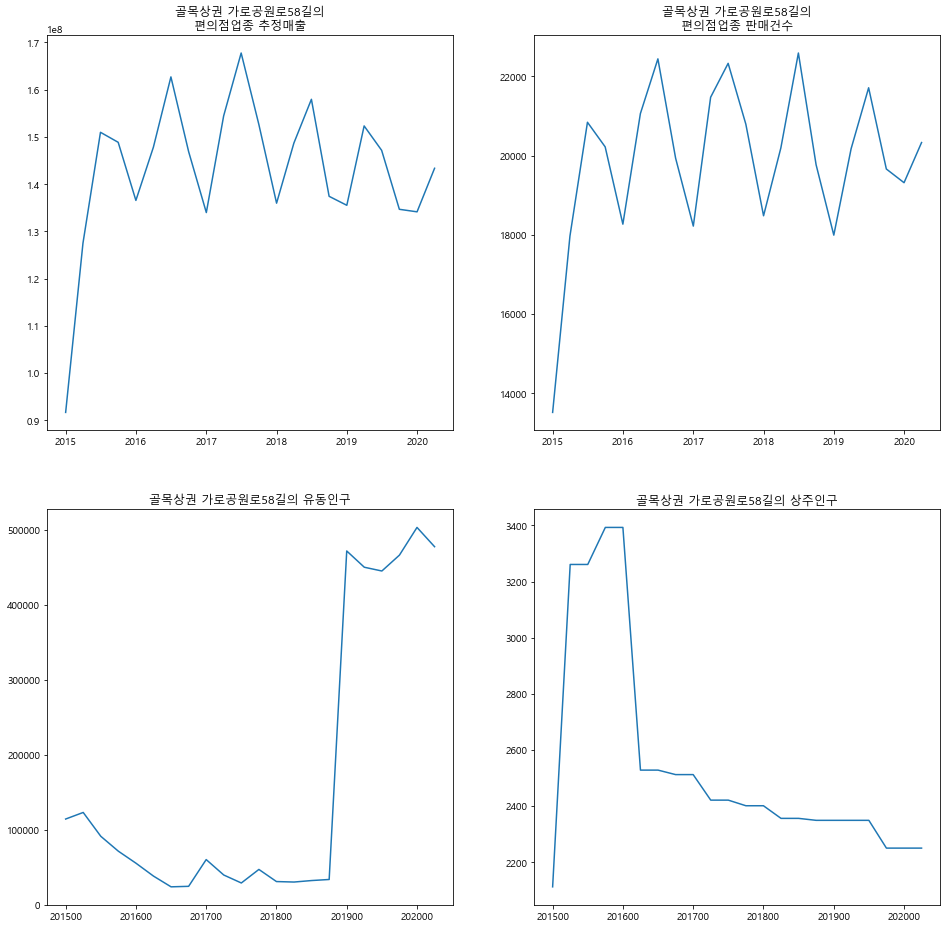

In [25]:
print(sel_sanggubun_str, sel_sanggwun_str+'의', sel_service_str+'업종의 데이터 입니다')
print('')

fig, axs = plt.subplots(figsize=(16, 16), ncols=2, nrows=2)

sns.lineplot(x=sel_data_time, y=sel_data_sel_amt, ax=axs[0][0])
sns.lineplot(x=sel_data_time, y=sel_data_sel_count, ax=axs[0][1])
sns.lineplot(x=yudong_time, y=yudong_data, ax=axs[1][0])
sns.lineplot(x=sangju_time, y=sangju_data, ax=axs[1][1], )
axs[0, 0].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의\n'+ sel_service_str+"업종 추정매출")
axs[0, 1].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의\n'+ sel_service_str+"업종 판매건수")
axs[1, 0].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의 '+"유동인구")
axs[1, 1].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의 '+"상주인구")






골목상권 가로공원로58길의 편의점업종의 데이터 입니다



Text(0.5, 1.0, '골목상권 가로공원로58길의 상주인구')

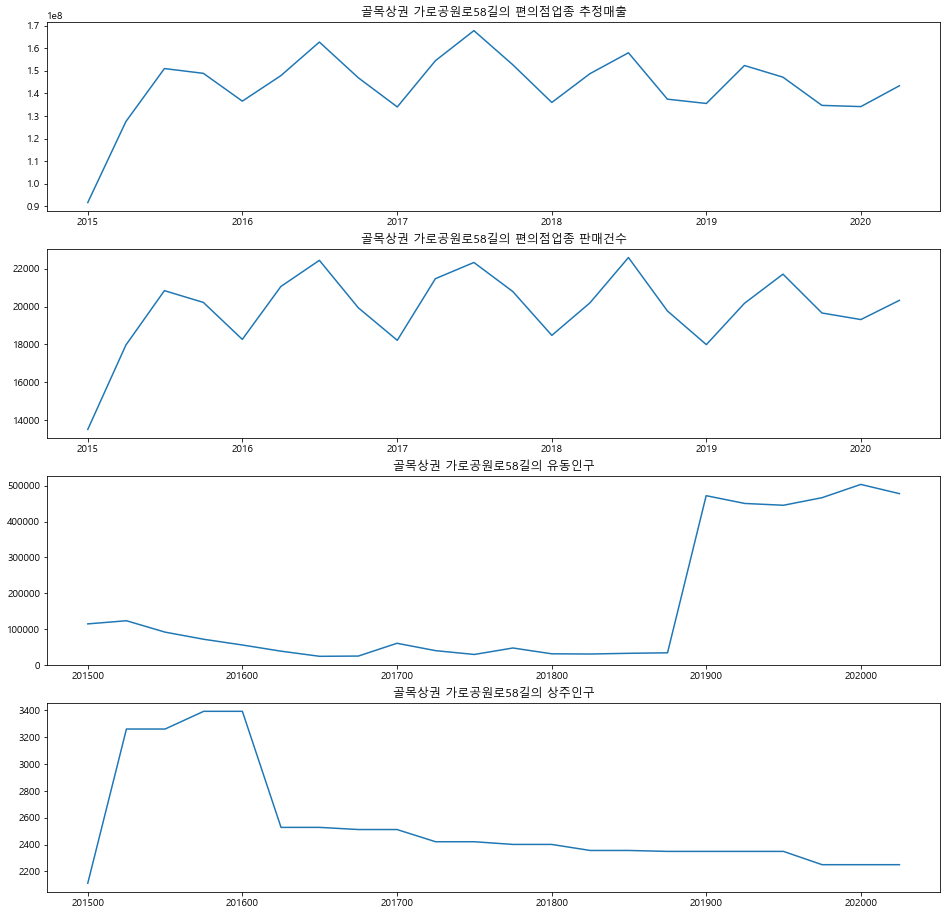

In [26]:
print(sel_sanggubun_str, sel_sanggwun_str+'의', sel_service_str+'업종의 데이터 입니다')
print('')

fig, axs = plt.subplots(figsize=(16, 16), ncols=1, nrows=4)

sns.lineplot(x=sel_data_time, y=sel_data_sel_amt, ax=axs[0])
sns.lineplot(x=sel_data_time, y=sel_data_sel_count, ax=axs[1])
sns.lineplot(x=yudong_time, y=yudong_data, ax=axs[2])
sns.lineplot(x=sangju_time, y=sangju_data, ax=axs[3], )
axs[0].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의 '+ sel_service_str+"업종 추정매출")
axs[1].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의 '+ sel_service_str+"업종 판매건수")
axs[2].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의 '+"유동인구")
axs[3].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의 '+"상주인구")






골목상권 가로공원로58길의 편의점업종의 데이터 입니다



Text(0.5, 1.0, '골목상권 가로공원로58길의 상주인구')

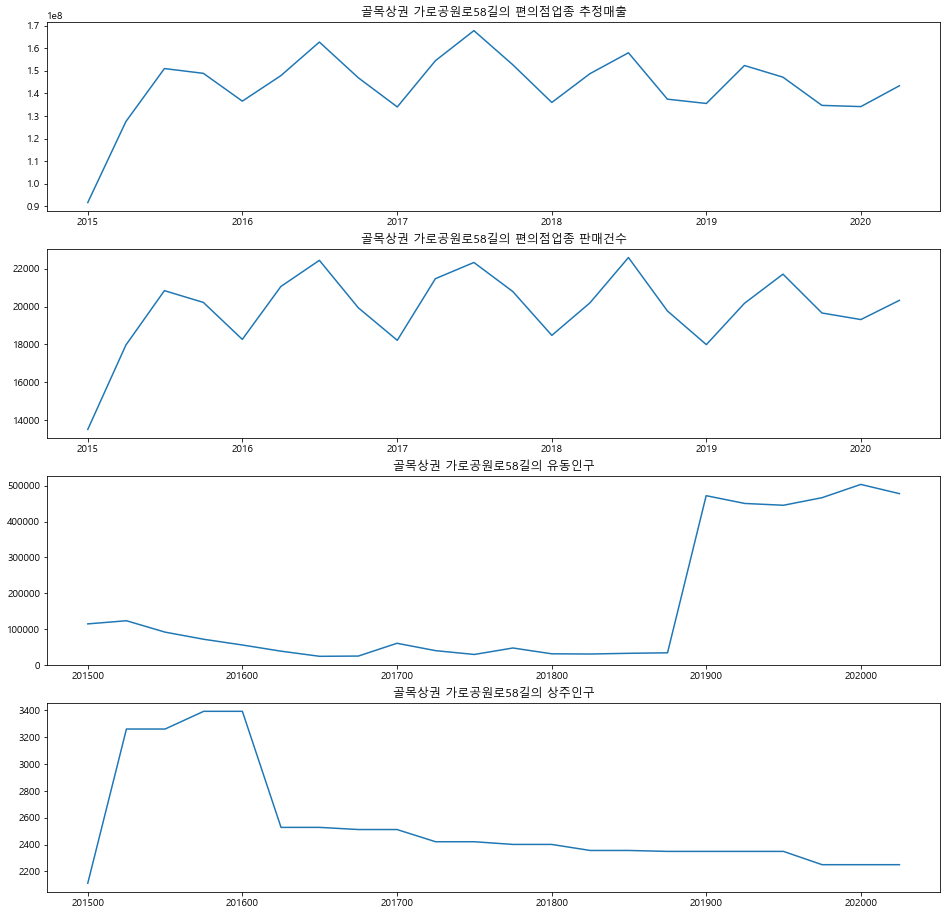

In [27]:
print(sel_sanggubun_str, sel_sanggwun_str+'의', sel_service_str+'업종의 데이터 입니다')
print('')

fig, axs = plt.subplots(figsize=(16, 16), ncols=1, nrows=4)

sns.lineplot(x=sel_data_time, y=sel_data_sel_amt, ax=axs[0])
sns.lineplot(x=sel_data_time, y=sel_data_sel_count, ax=axs[1])
sns.lineplot(x=yudong_time_ud, y=yudong_data_ud, ax=axs[2])
sns.lineplot(x=sangju_time_ud, y=sangju_data_ud, ax=axs[3], )
axs[0].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의 '+ sel_service_str+"업종 추정매출")
axs[1].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의 '+ sel_service_str+"업종 판매건수")
axs[2].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의 '+"유동인구")
axs[3].set_title(sel_sanggubun_str+' '+ sel_sanggwun_str+'의 '+"상주인구")






In [28]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, LSTM, Bidirectional, GRU, Dropout
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt



# 학습 데이터를 생성한다.
# ex: data = [1,2,3,4,5,6,7,8,9,10]가 주어졌을 때 generateX(data, 5)를 실행하면
# 아래와 같은 학습데이터 변환한다.
#
# x                      y
# ---------              -
# 1,2,3,4,5              6
# 2,3,4,5,6              7
# 3,4,5,6,7              8
# ...

from sklearn.preprocessing import MinMaxScaler


def generateX(a, n):
    x_train = []
    y_train = []
    for i in range(len(a)):
        x = a[i:(i + n)]
        if (i + n) < len(a):
            x_train.append(x)
            y_train.append(a[i + n])
        else:
            break
    return np.array(x_train), np.array(y_train)

# 학습 데이터 생성한다
look_back = 3
scalar = MinMaxScaler(feature_range=(0,1))
yudong_data = scalar.fit_transform(yudong_data.reshape(-1,1))
yudong_x, yudong_y = generateX(yudong_data, look_back)
yudong_y = yudong_y.reshape(-1,1)
yudong_x = yudong_x.reshape(-1,look_back,1)
yudong_y = yudong_y.reshape(-1,1)

In [29]:
len(yudong_x),len(yudong_y)

(19, 19)

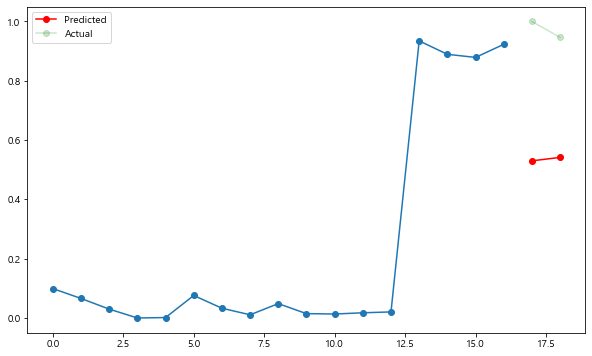

In [30]:
# 학습용 데이터와 시험용 데이터
x_train = yudong_x[:len(yudong_x)-2, :]
y_train = yudong_y[:len(yudong_x)-2:, :]
x_test = yudong_x[len(yudong_x)-2:, :]
y_test = yudong_y[len(yudong_x)-2:, :]



# 2층-양방항 구조의 LSTM 모델을 생성한다.
K.clear_session()     # 모델 생성전에 tensorflow의 graph 영역을 clear한다.
xInput = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
xLstm_1 = GRU(20, return_sequences = True)(xInput)
xLstm_2 = Bidirectional(GRU(20))(xLstm_1)
xOutput = Dense(1)(xLstm_2)


model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer='adam')



# 학습
model.fit(x_train, y_train, epochs=10, batch_size=100,verbose=0)



# 예측
yudong_y_hat = model.predict(x_test, batch_size=100)



# 예측 결과 시각화
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(yudong_y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(-1,), 'o-')
plt.plot(b_axis, yudong_y_hat.reshape(-1,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(-1,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

inv_yudong_y_hat = scalar.inverse_transform(yudong_y_hat)

In [31]:
# 학습 데이터를 생성한다
scalar = MinMaxScaler(feature_range=(0,1))
sangju_data = scalar.fit_transform(sangju_data.reshape(-1,1))
sangju_x, sangju_y = generateX(sangju_data, look_back)

sangju_x = sangju_x.reshape(-1,look_back,1)
sangju_y = sangju_y.reshape(-1,1)

In [32]:
len(sangju_x), len(sangju_y)

(19, 19)

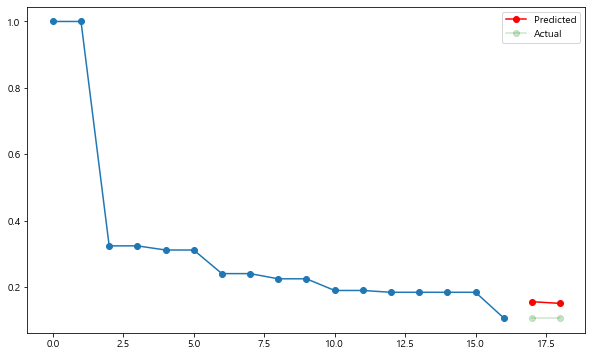

In [33]:
# 학습용 데이터와 시험용 데이터
x_train = sangju_x[:len(sangju_x)-2, :, :]
y_train = sangju_y[:len(sangju_x)-2:, :]
x_test = sangju_x[len(sangju_x)-2:, :, :]
y_test = sangju_y[len(sangju_x)-2:, :]



# 2층-양방항 구조의 LSTM 모델을 생성한다.
K.clear_session()     # 모델 생성전에 tensorflow의 graph 영역을 clear한다.
xInput = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
xLstm_1 = GRU(20, return_sequences = True)(xInput)
xLstm_2 = Bidirectional(GRU(20))(xLstm_1)
xOutput = Dense(1)(xLstm_2)


model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer='adam')



# 학습
model.fit(x_train, y_train, epochs=10, batch_size=100,verbose=0)



# 예측
sangju_y_hat = model.predict(x_test, batch_size=100)



# 예측 결과 시각화
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(sangju_y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(-1,), 'o-')
plt.plot(b_axis, sangju_y_hat.reshape(-1,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(-1,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

In [34]:
inv_sangju_y_hat = scalar.inverse_transform(sangju_y_hat)

In [35]:
# 학습 데이터를 생성한다

scalar = MinMaxScaler(feature_range=(0,1))
sel_data_sel_count = scalar.fit_transform(sel_data_sel_count.reshape(-1,1))
sel_count_x, sel_count_y = generateX(sel_data_sel_count, look_back)

sel_count_x = sel_count_x.reshape(-1,look_back,1)
sel_count_y = sel_count_y.reshape(-1,1)

In [36]:
len(sel_count_x), len(sel_count_y)

(19, 19)

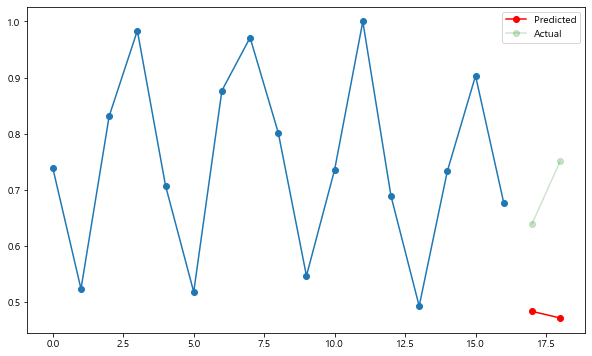

In [37]:
# 학습용 데이터와 시험용 데이터
x_train = sel_count_x[:len(sel_count_x)-2, :]
y_train = sel_count_y[:len(sel_count_x)-2, :]
x_test = sel_count_x[len(sel_count_x)-2:, :]
y_test = sel_count_y[len(sel_count_x)-2:, :]



# 2층-양방항 구조의 LSTM 모델을 생성한다.
K.clear_session()     # 모델 생성전에 tensorflow의 graph 영역을 clear한다.
xInput = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
xLstm_1 = GRU(20, return_sequences = True)(xInput)
xLstm_2 = Bidirectional(GRU(20))(xLstm_1)
xOutput = Dense(1)(xLstm_2)


model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer='adam')



# 학습
model.fit(x_train, y_train, epochs=10, batch_size=100,verbose=0)



# 예측
sel_count_y_hat = model.predict(x_test, batch_size=100)



# 예측 결과 시각화
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(sel_count_y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(-1,), 'o-')
plt.plot(b_axis, sel_count_y_hat.reshape(-1,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(-1,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

inv_sel_count_y_hat = scalar.inverse_transform(sel_count_y_hat)

In [38]:
# 학습 데이터를 생성한다

scalar = MinMaxScaler(feature_range=(0,1))
sel_data_sel_count = scalar.fit_transform(sel_data_store_count.reshape(-1,1))


store_count_x, store_count_y = generateX(sel_data_store_count, look_back)
store_count_x = store_count_x.reshape(-1,look_back,1)
store_count_y = store_count_y.reshape(-1,1)

In [39]:
len(store_count_x), len(sel_count_y)

(19, 19)

In [55]:
store_count_x, store_count_y

(array([[[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]],
 
        [[1],
         [1],
         [1]]], dtype=int64),
 array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
  

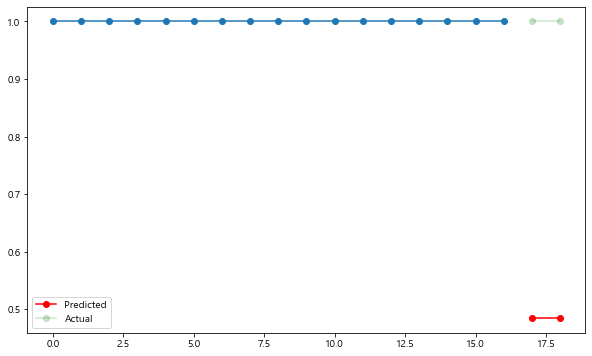

In [41]:
# 학습용 데이터와 시험용 데이터
x_train = store_count_x[:len(store_count_x)-2, :]
y_train = store_count_y[:len(store_count_x)-2, :]
x_test = store_count_x[len(store_count_x)-2:, :]
y_test = store_count_y[len(store_count_x)-2:, :]



# 2층-양방항 구조의 LSTM 모델을 생성한다.
K.clear_session()     # 모델 생성전에 tensorflow의 graph 영역을 clear한다.
xInput = Input(batch_shape=(None, x_train.shape[1], x_train.shape[2]))
xLstm_1 = GRU(20, return_sequences = True)(xInput)
xLstm_2 = Bidirectional(GRU(20))(xLstm_1)
xOutput = Dense(1)(xLstm_2)


model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer='adam')



# 학습
model.fit(x_train, y_train, epochs=10, batch_size=100,verbose=0)



# 예측
store_count_y_hat = model.predict(x_test, batch_size=100)



# 예측 결과 시각화
a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(store_count_y_hat))

plt.figure(figsize=(10,6))
plt.plot(a_axis, y_train.reshape(-1,), 'o-')
plt.plot(b_axis, store_count_y_hat.reshape(-1,), 'o-', color='red', label='Predicted')
plt.plot(b_axis, y_test.reshape(-1,), 'o-', color='green', alpha=0.2, label='Actual')
plt.legend()
plt.show()

inv_store_count_y_hat = scalar.inverse_transform(store_count_y_hat)

In [56]:
store_count_y_hat

array([[0.48484063],
       [0.48484063]], dtype=float32)

In [42]:
print(sangju_y_hat,yudong_y_hat,sel_count_y_hat,store_count_y_hat)
print(inv_sangju_y_hat,inv_yudong_y_hat,inv_sel_count_y_hat,inv_store_count_y_hat)

[[0.1567242 ]
 [0.15163288]] [[0.5299678]
 [0.5414661]] [[0.48392645]
 [0.47208378]] [[0.48484063]
 [0.48484063]]
[[2312.7637]
 [2306.2417]] [[278054.84]
 [283568.97]] [[17907.115]
 [17799.633]] [[1.4848406]
 [1.4848406]]


In [43]:
new_data['총_상주인구_수'] = np.log1p(inv_sangju_y_hat.reshape(-1))
new_data['총_유동인구_수'] = np.log1p(inv_yudong_y_hat.reshape(-1))
new_data['당월_매출_건수'] = np.log1p(inv_sel_count_y_hat.reshape(-1))
new_data['점포수'] = np.log1p(inv_store_count_y_hat.reshape(-1))
new_data['기준_년_코드'] = (np.ones(2)*2020)
new_data['기준_분기_코드'] = np.array([1, 2])
new_data['시계열_코드'] = np.array([202000,202025])

In [44]:
len(new_data.columns)

1598

In [45]:
new_data['상권_구분_코드_명_'+sel_sanggubun_str] = np.ones(2)
new_data['상권_코드_명_'+sel_sanggwun_str] = np.ones(2)
new_data['서비스_업종_코드_명_'+sel_service_str] = np.ones(2)

In [46]:
len(new_data.columns)

1598

In [47]:
new_data['기준_년_코드'] = (np.ones(2)*2020)

In [48]:
len(new_data.columns)

1598

In [49]:
quart_ = [int(00),int(25)]
new_data['기준_분기_코드'] = np.array(quart_)

In [50]:
len(new_data.columns)

1598

In [51]:
new_data

,상권_구분_코드_명_골목상권,상권_구분_코드_명_관광특구,상권_구분_코드_명_발달상권,상권_구분_코드_명_전통시장,상권_코드_명_가락시장,상권_코드_명_가로공원로58길,상권_코드_명_가로공원로76가길,상권_코드_명_가로공원로80길,상권_코드_명_가리봉시장,상권_코드_명_가마산로61길,...,서비스_업종_코드_명_화초,서비스_업종_코드_명_화초·애완,서비스_업종_코드_명_회계사사무소,총_상주인구_수,총_유동인구_수,당월_매출_건수,점포수,기준_년_코드,기준_분기_코드,시계열_코드
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.746631,12.535577,9.793009,0.910209,2020.0,0,202000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.743808,12.555214,9.786989,0.910209,2020.0,25,202025


In [52]:
pred_jbl = job_model.predict(new_data)
pred_jbl

array([140075.54743554, 140084.17802462])

In [53]:
pred_pkl = pkl_model.predict(new_data)
expm1_pred_pkl = np.expm1(pred_pkl)

C:\Users\TJ\anaconda3\envs\ml01-02\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in expm1
  


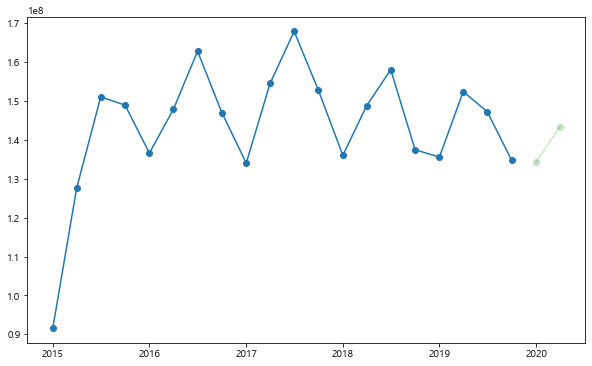

In [54]:
a_axis = sel_data_sorted['시계열_코드'].values[:-2]
b_axis = sel_data_sorted['시계열_코드'].values[-2:]

plt.figure(figsize=(10,6))
plt.plot(a_axis, sel_data_sorted['당월_매출_금액'].values[:-2], 'o-')
plt.plot(b_axis, expm1_pred_pkl, 'o-', color='red', label='Predicted')
plt.plot(b_axis, sel_data_sorted['당월_매출_금액'].values[-2:], 'o-', color='green', alpha=0.2, label='Actual')
# plt.legend()
plt.show()